### <h1><b>DATA COLLECTION AND PREPARATION

***Importing all libraries and their functions***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")



***Read the  Data using pandas as pd***

In [3]:
gd=pd.read_csv('sdss_100k_galaxy_form_burst.csv')
gd


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1.237650e+18,8.175190e+18,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1.237650e+18,8.175190e+18,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1.237650e+18,8.175190e+18,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1.237650e+18,3.321520e+17,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1.237650e+18,3.321540e+17,198.706863,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237670e+18,3.130040e+18,228.558321,16.759520,20.09288,18.25375,17.28985,16.82903,16.43054,9.177956,...,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,GALAXY,STARFORMING,0.116555,0.000022
99996,1.237670e+18,5.077950e+18,119.601880,10.351615,22.09939,20.82547,19.02462,18.43225,17.96795,1.432706,...,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,GALAXY,STARFORMING,0.366410,0.000093
99997,1.237670e+18,2.834000e+18,235.609200,15.242749,19.31622,18.14944,17.45517,17.04435,16.77127,18.770960,...,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,GALAXY,STARFORMING,0.127064,0.000010
99998,1.237670e+18,2.834000e+18,235.789986,15.189821,19.03856,18.17619,17.53119,17.05532,16.85166,24.241610,...,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,GALAXY,STARFORMING,0.116330,0.000011


***<h3>data preparation***

In [4]:
gd.shape     # define no of rows and columns in dataset

(100000, 43)

In [5]:
gd.columns #columns names of dataset

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g',
       'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err'],
      dtype='object')

In [6]:
gd.isnull().sum()     # checking for the null values in each row and counting it

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  float64
 1   specobjid     100000 non-null  float64
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [8]:
gd=gd.drop([ 'objid','dec','ra', 'specobjid','class'],axis=1 )   #droping the unsed column as it doesnot hellp us in as predtion furthure

***Changing object type in the form categorial values 0 and 1 of subclass***

In [9]:
gd['subclass'].replace(['STARFORMING','STARBURST'],[0,1], inplace=True)  
gd

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0,0.067749,0.000015
1,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0,0.105118,0.000010
2,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0,0.234089,0.000030
3,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0,0.110825,0.000030
4,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,0,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.09288,18.25375,17.28985,16.82903,16.43054,9.177956,49.945560,121.35520,185.51900,267.78230,...,18.36605,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,0,0.116555,0.000022
99996,22.09939,20.82547,19.02462,18.43225,17.96795,1.432706,4.673576,24.55518,42.37332,64.97742,...,19.84113,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,0,0.366410,0.000093
99997,19.31622,18.14944,17.45517,17.04435,16.77127,18.770960,54.982040,104.21510,152.14590,195.65200,...,19.11502,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,0,0.127064,0.000010
99998,19.03856,18.17619,17.53119,17.05532,16.85166,24.241610,53.644460,97.16785,150.61570,181.68840,...,18.01613,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,0,0.116330,0.000011


### <h1><b>EDA (Exloratory Data Analysis)

In [10]:
gd.describe()

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,244.728134,307.474895,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,619.825871,809.166087,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,-54.385510,-144.460200,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,91.777325,104.256550,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,145.664550,180.086150,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,244.944825,307.044675,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000016
max,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,51923.480000,79058.460000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


In [11]:
dupl=gd.duplicated().any()
print('duplicate reslut:')
dupl

duplicate reslut:


False

***<h2>Visual Analysis of Dataset***

In [12]:
pt=gd['subclass'].value_counts()
pt

subclass
0    74993
1    25007
Name: count, dtype: int64

***<h3>Univariate Analysis***

array([<Axes: ylabel='count'>], dtype=object)

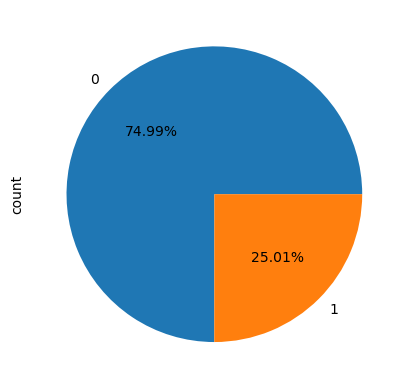

In [13]:
pt.plot(kind="pie",subplots=True, autopct="%1.2f%%")

***<h4>Checking for the Outliers in dataset for each Columns using Boxplot***

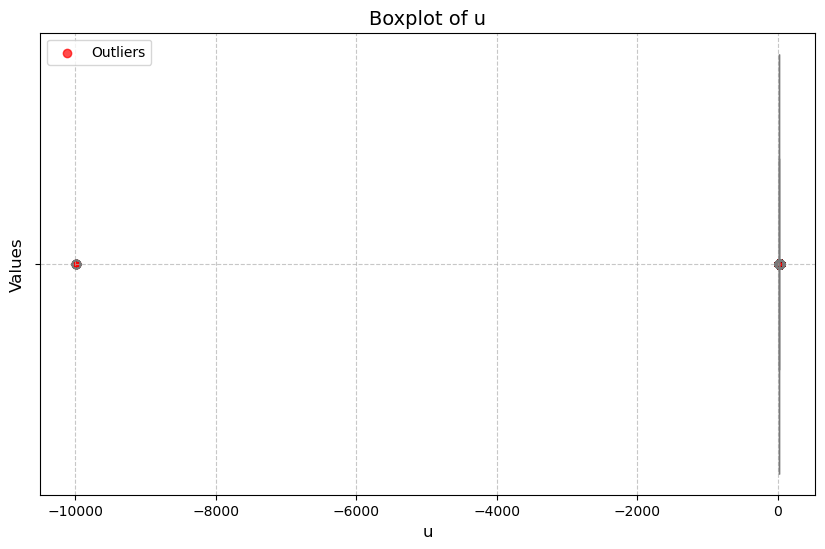

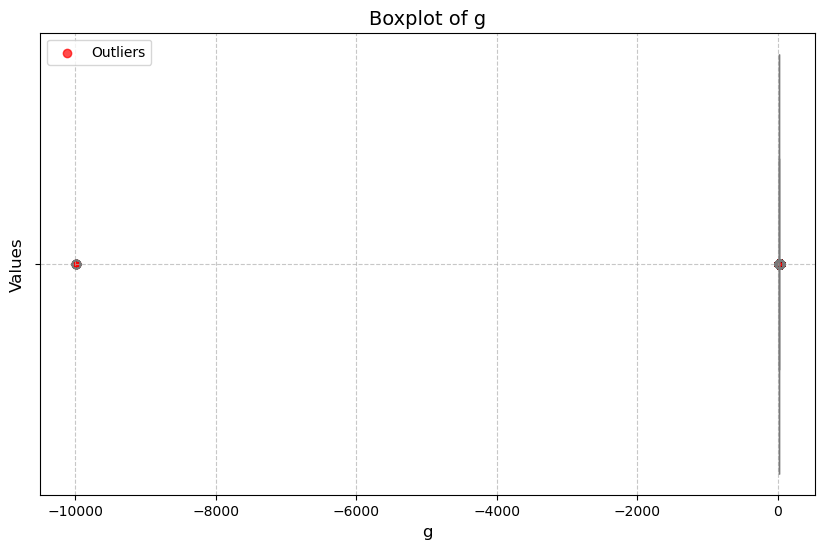

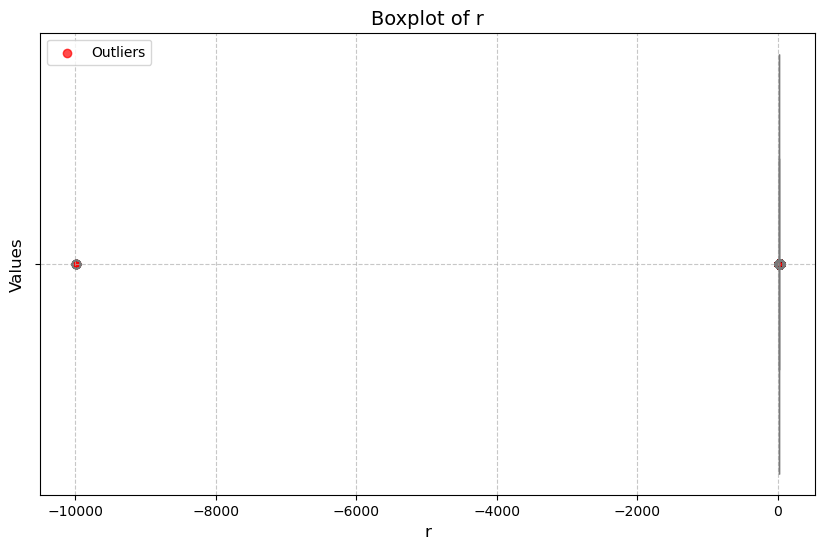

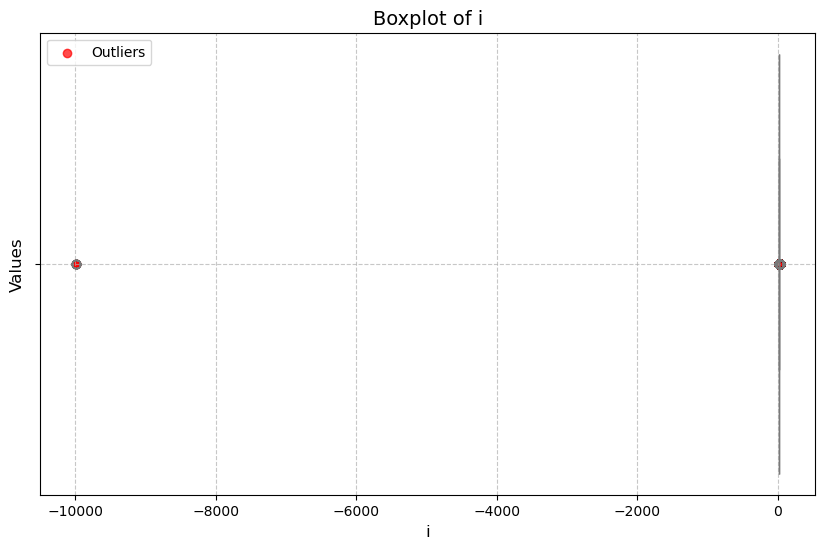

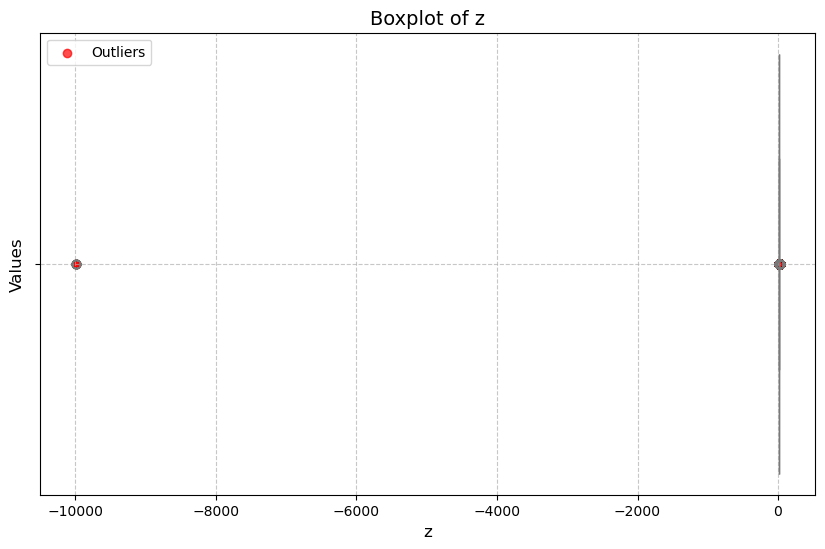

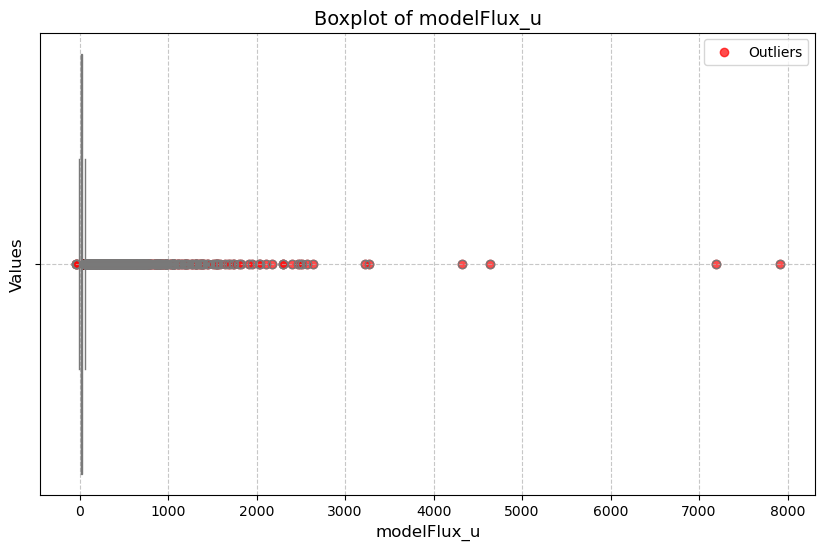

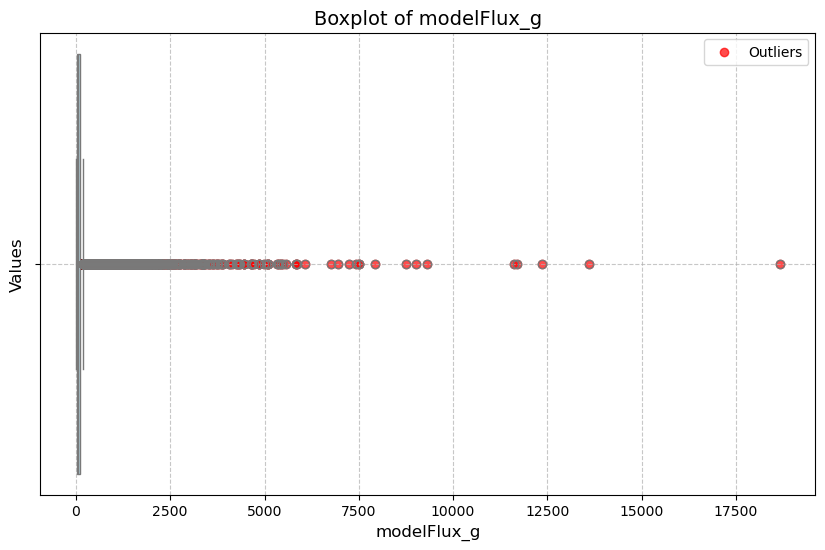

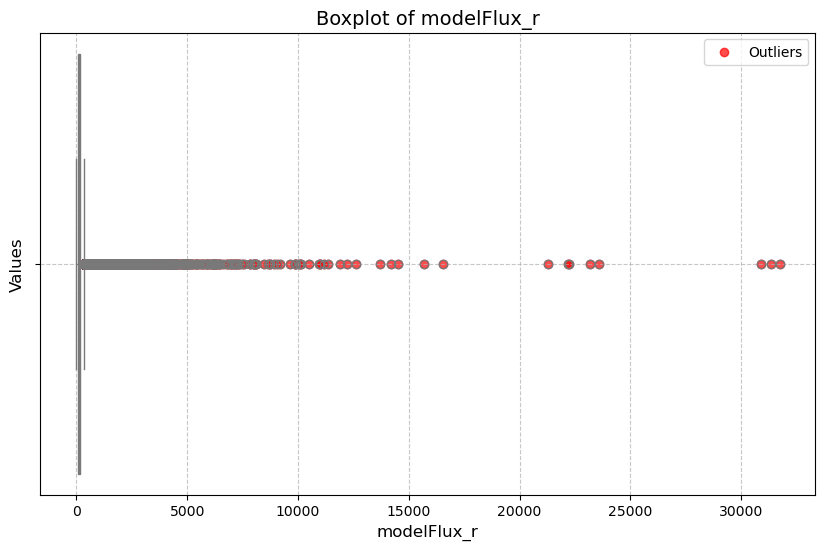

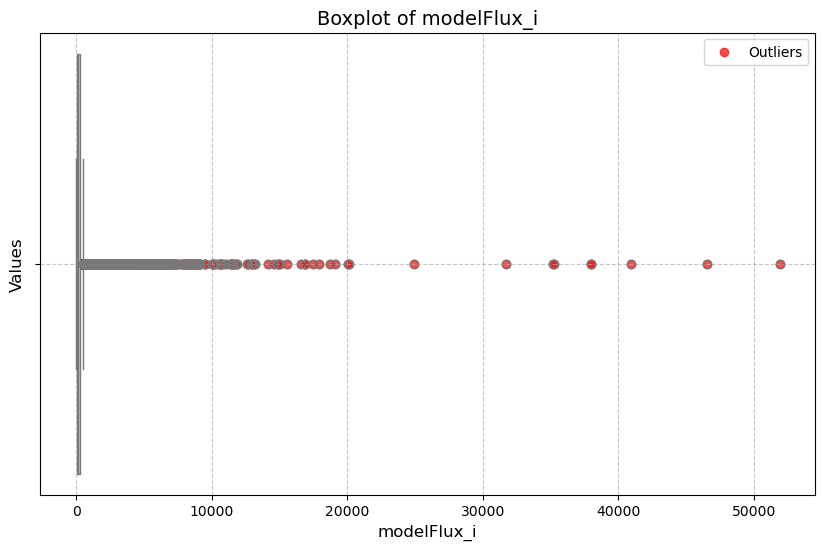

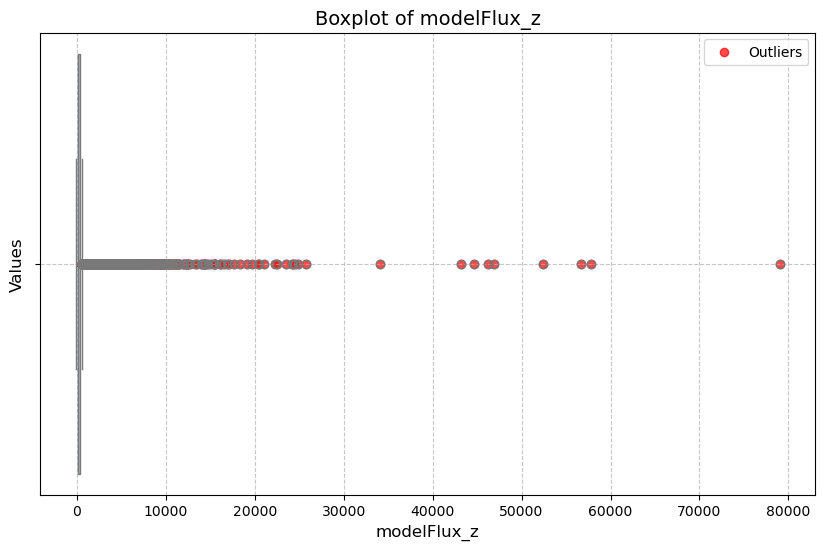

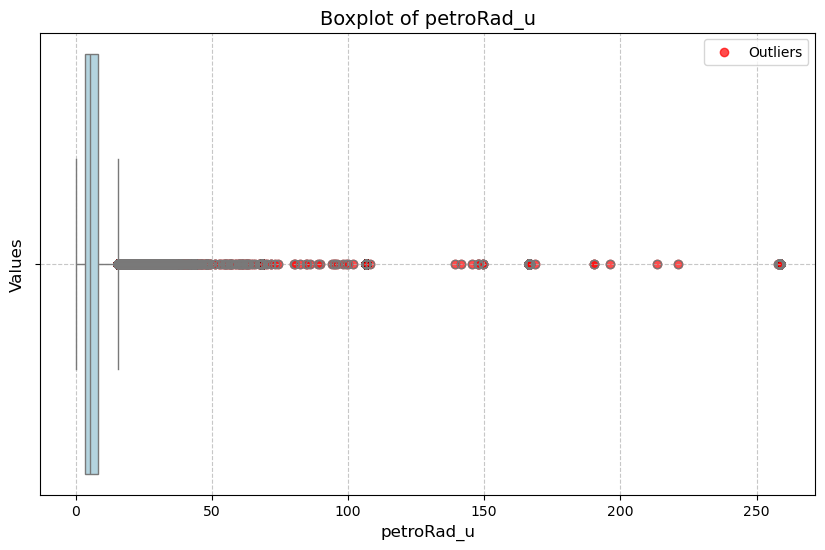

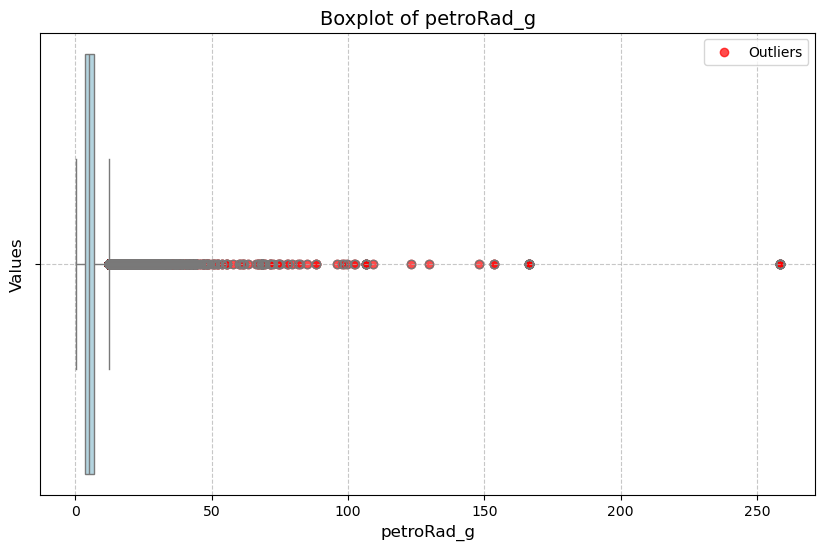

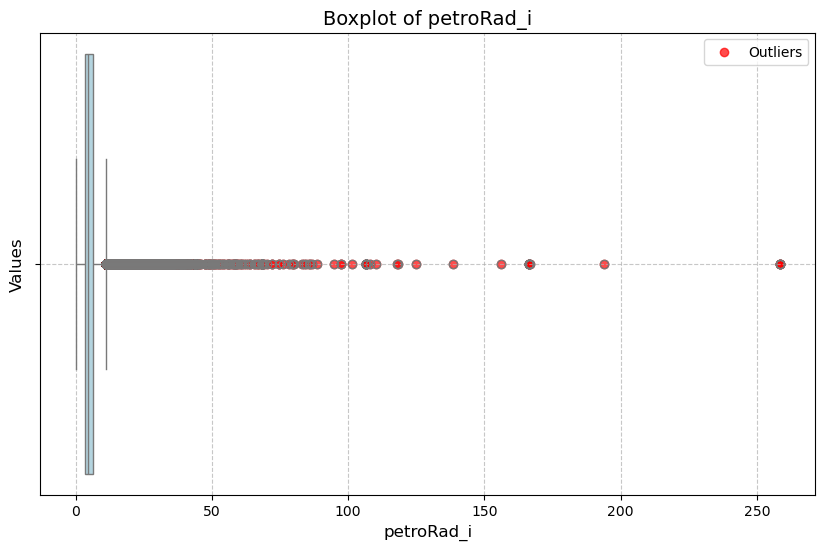

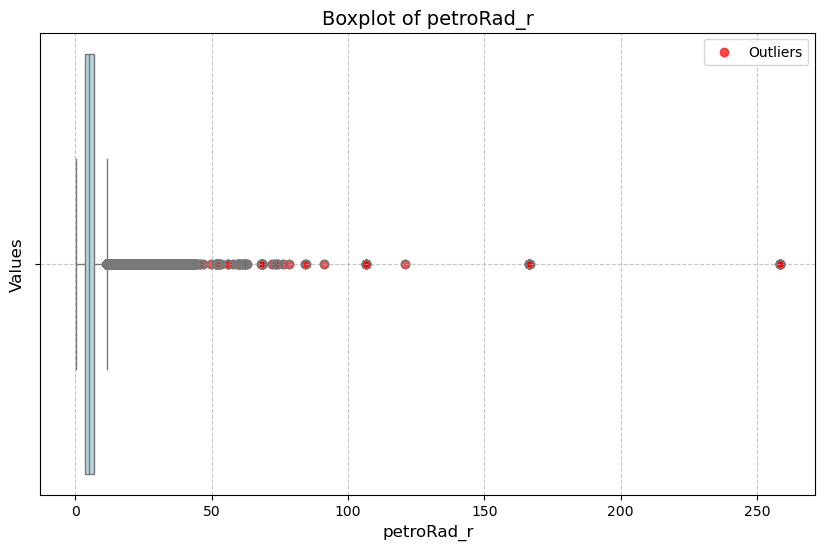

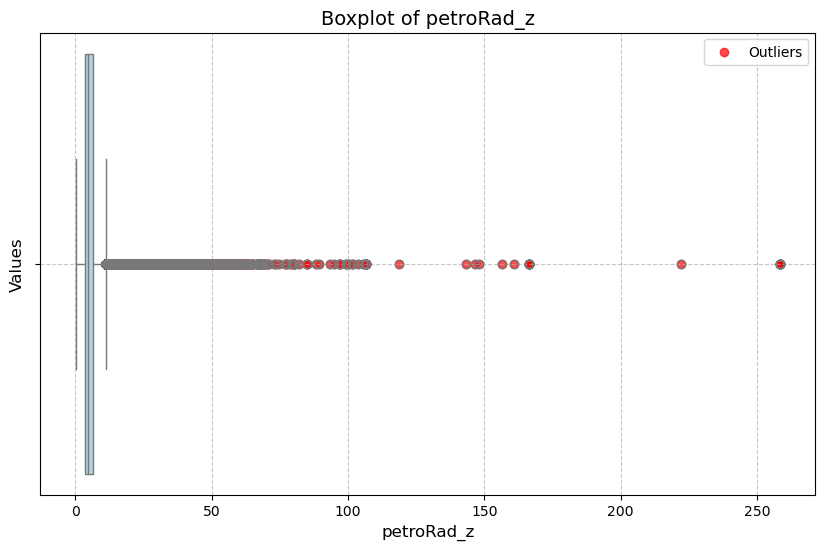

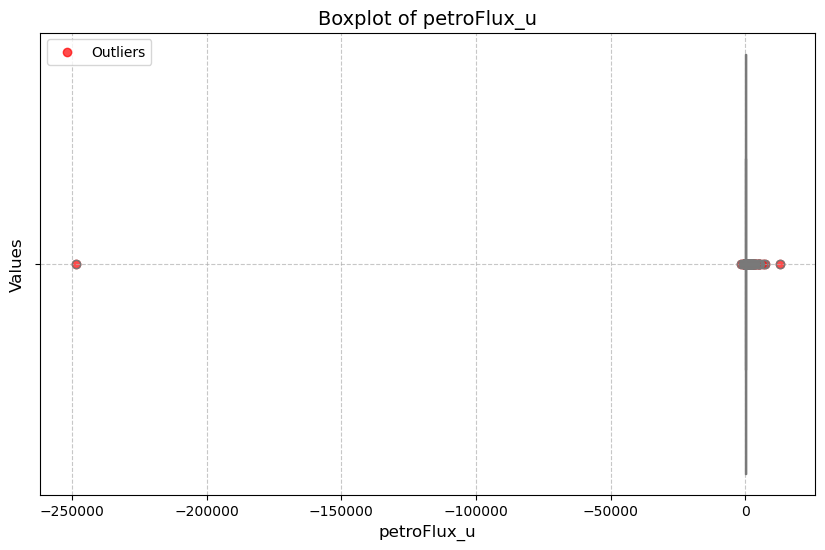

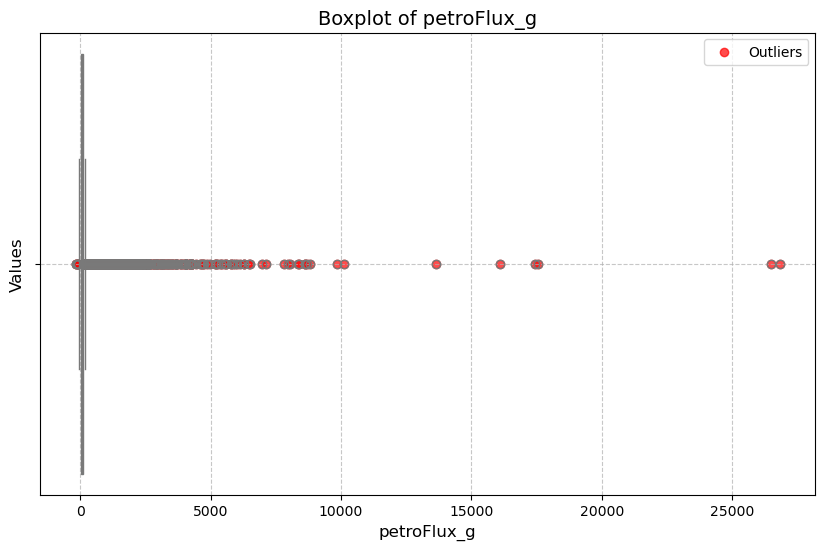

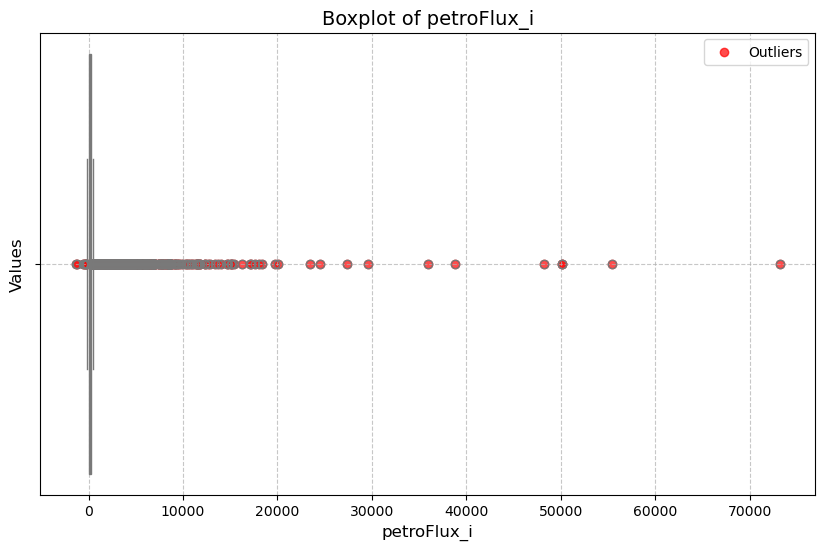

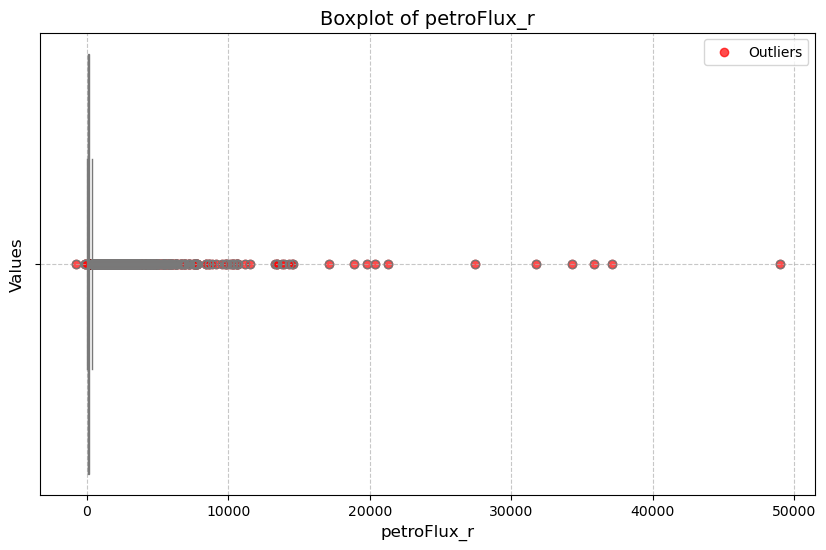

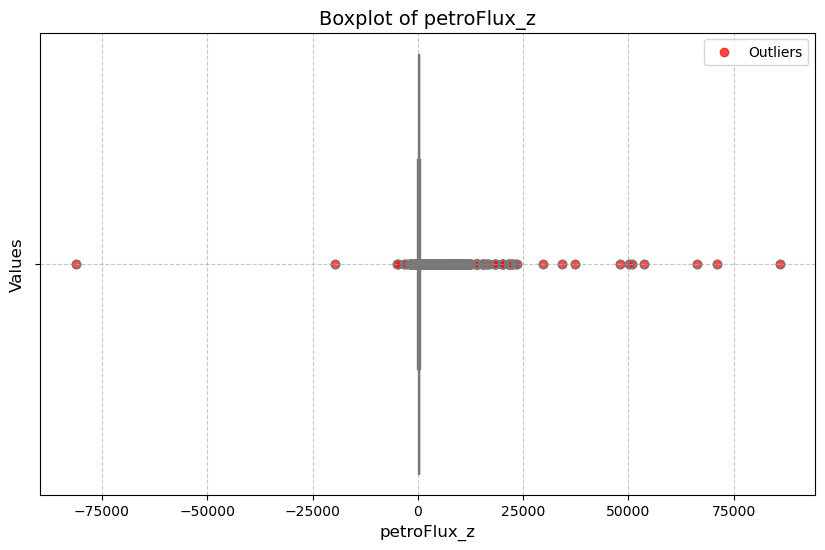

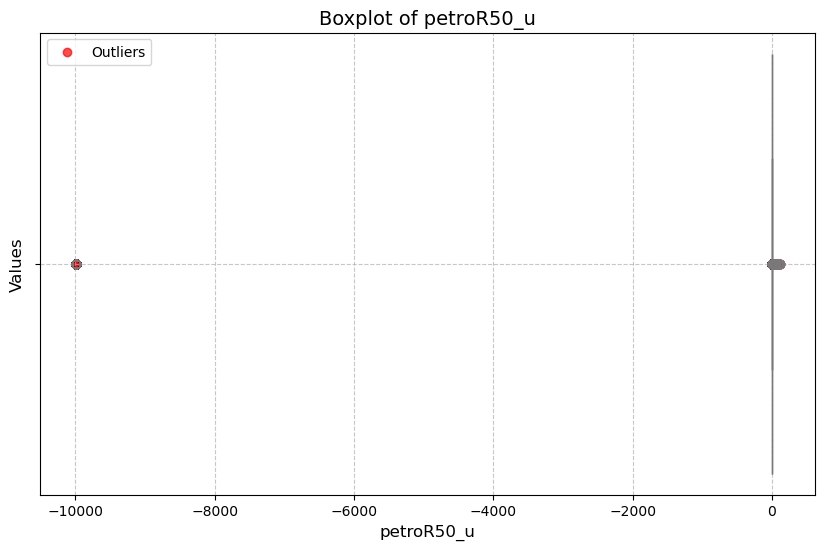

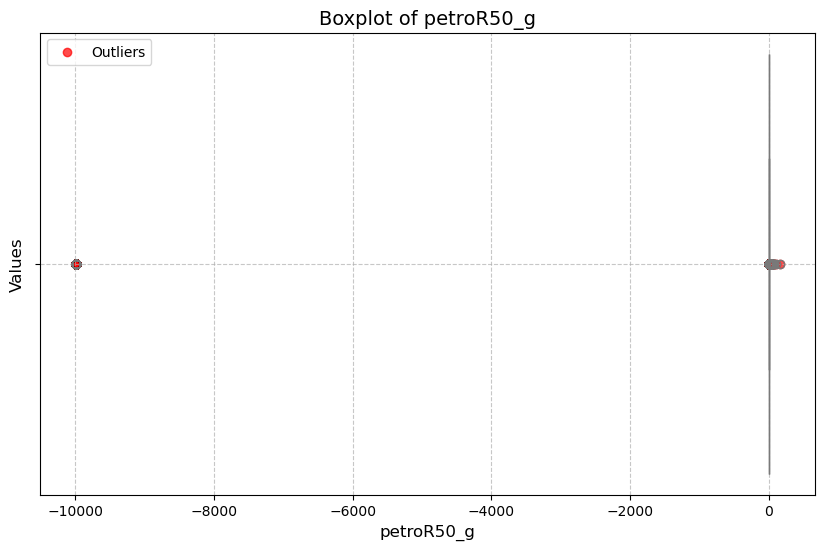

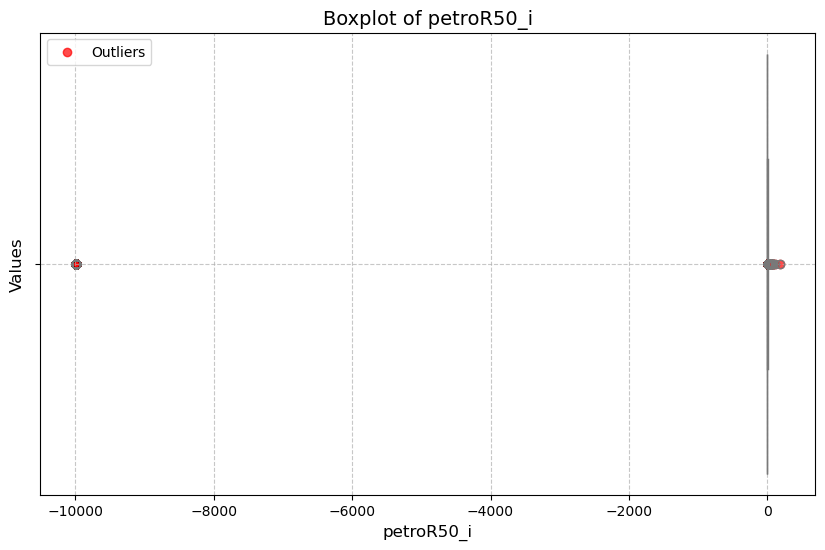

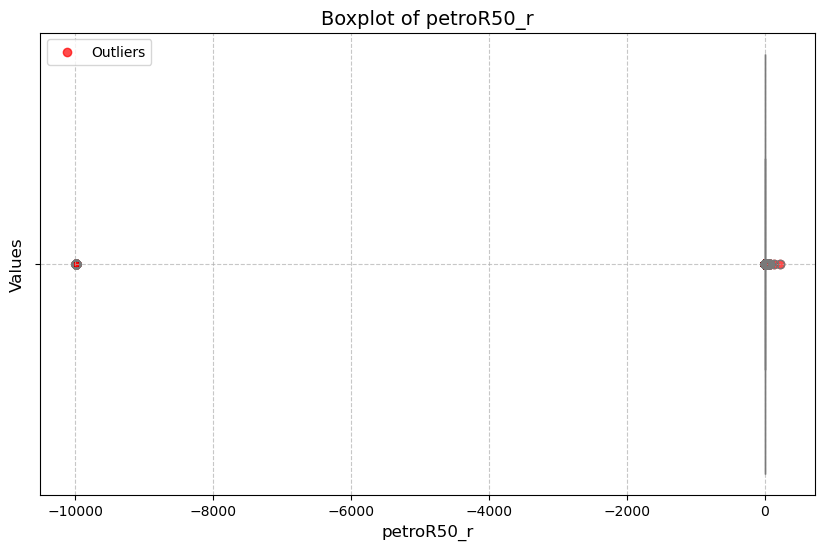

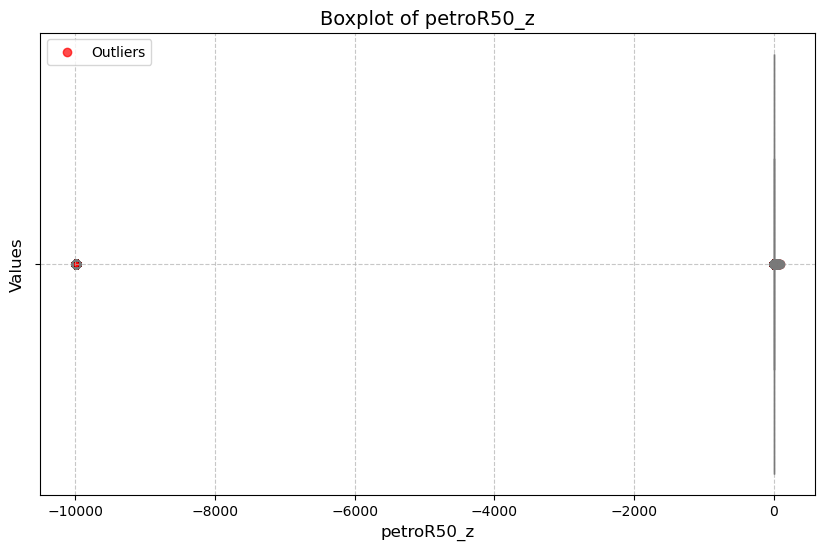

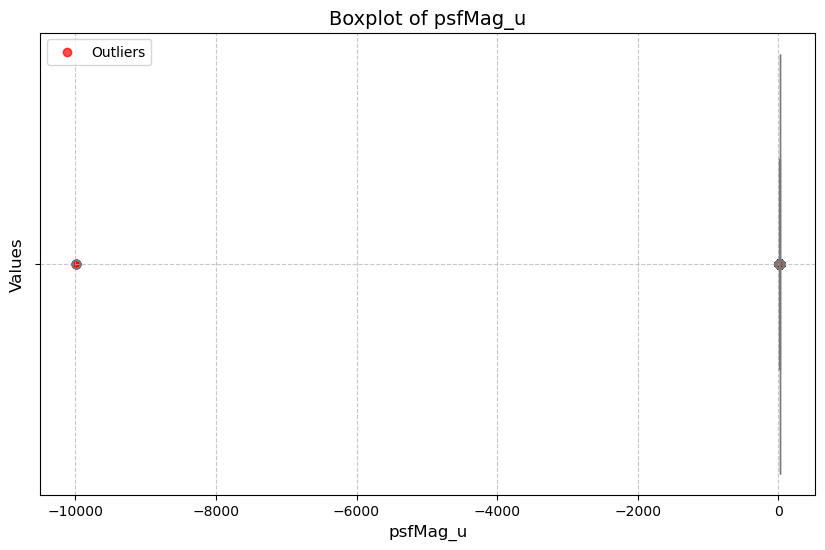

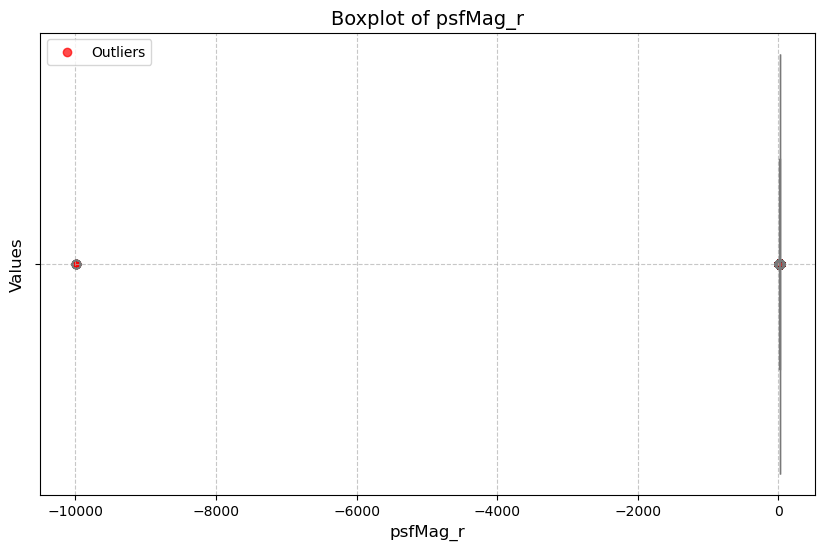

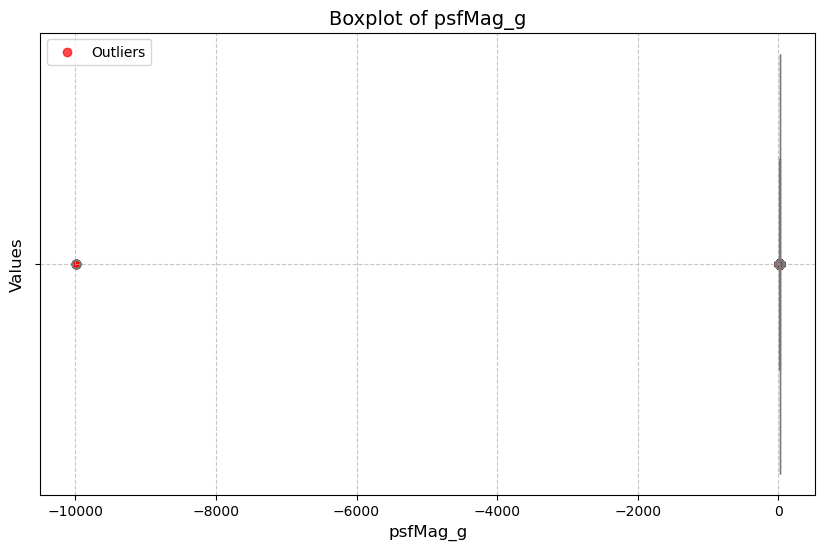

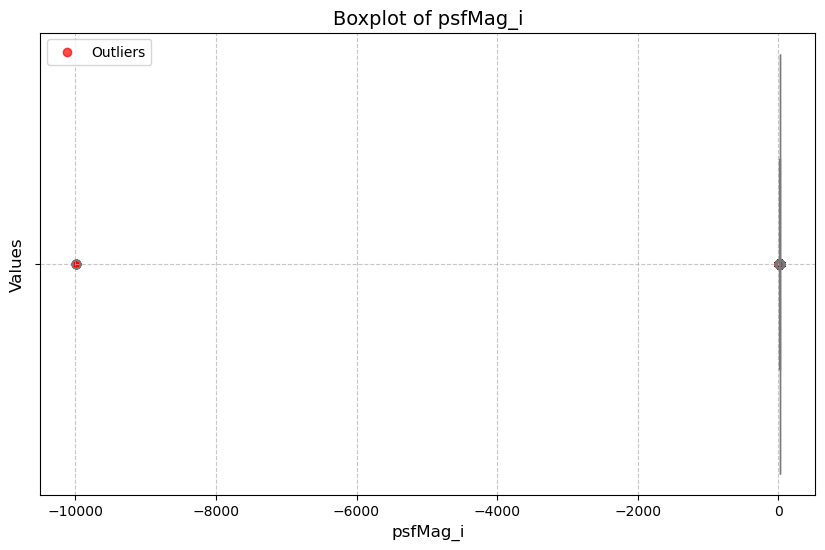

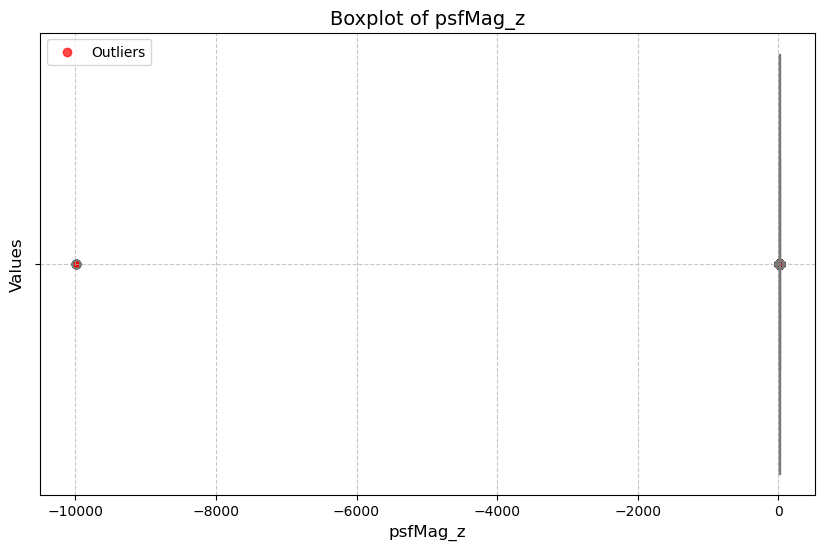

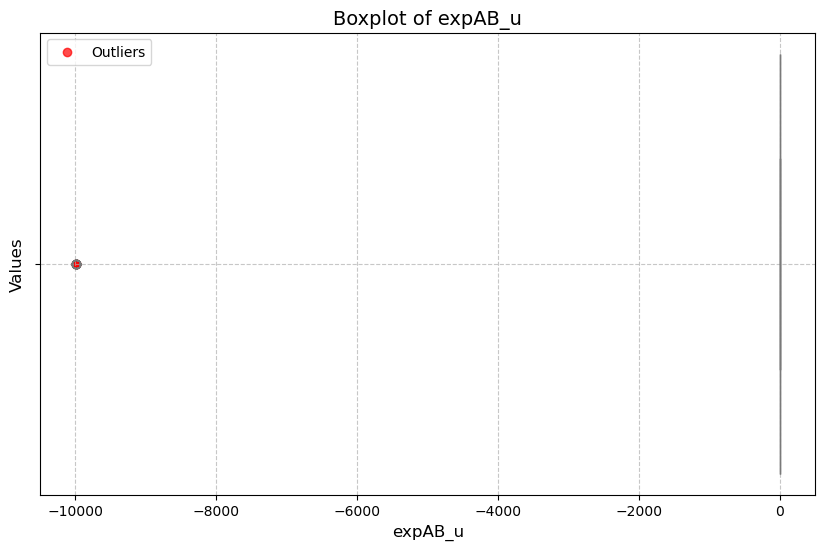

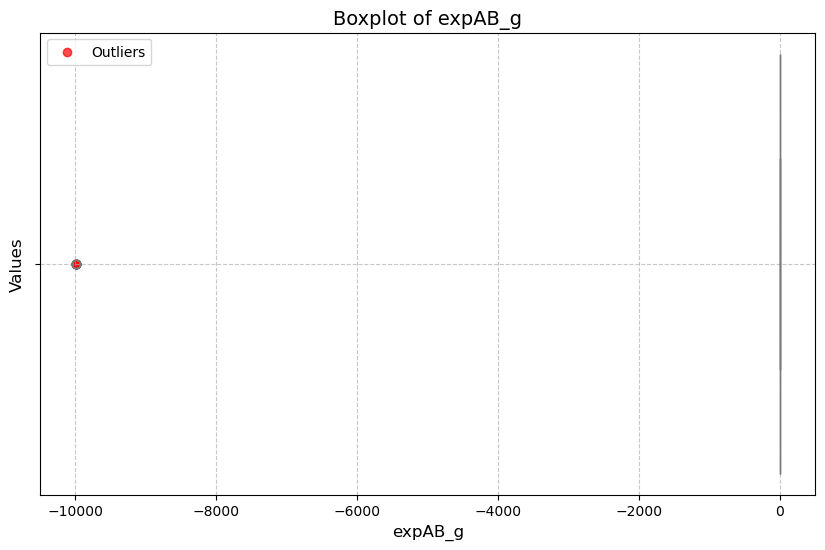

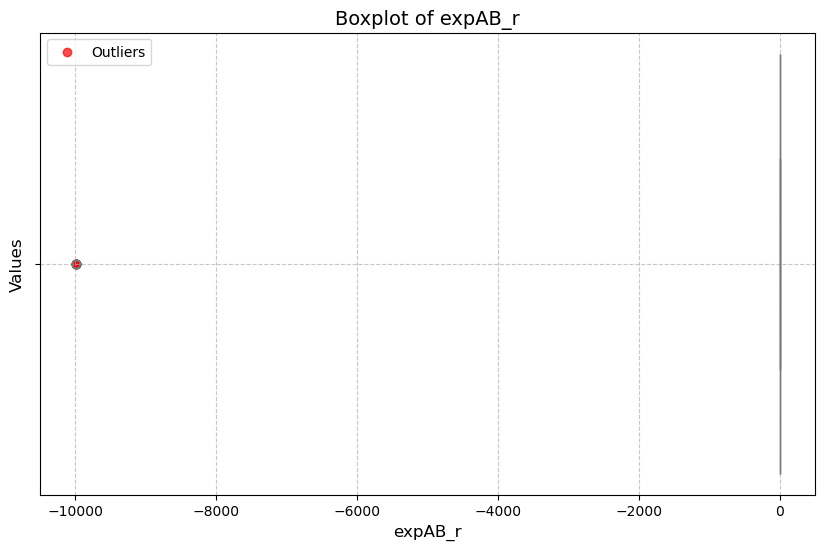

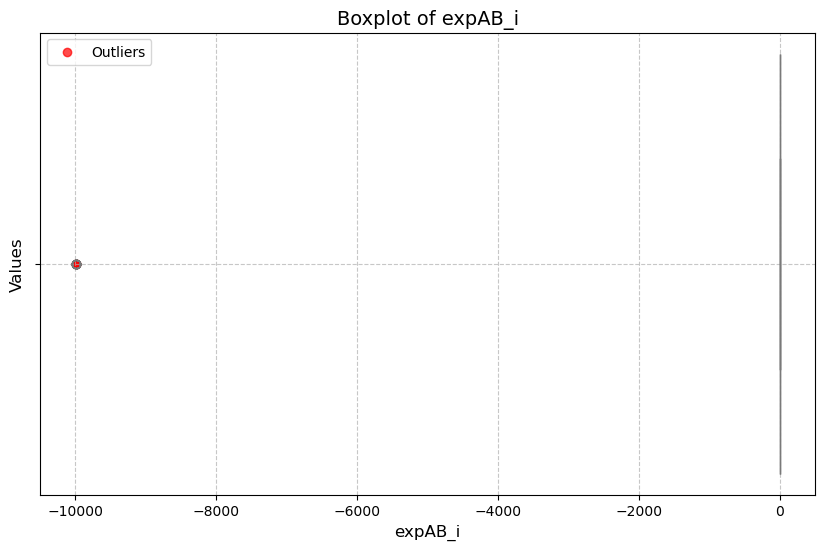

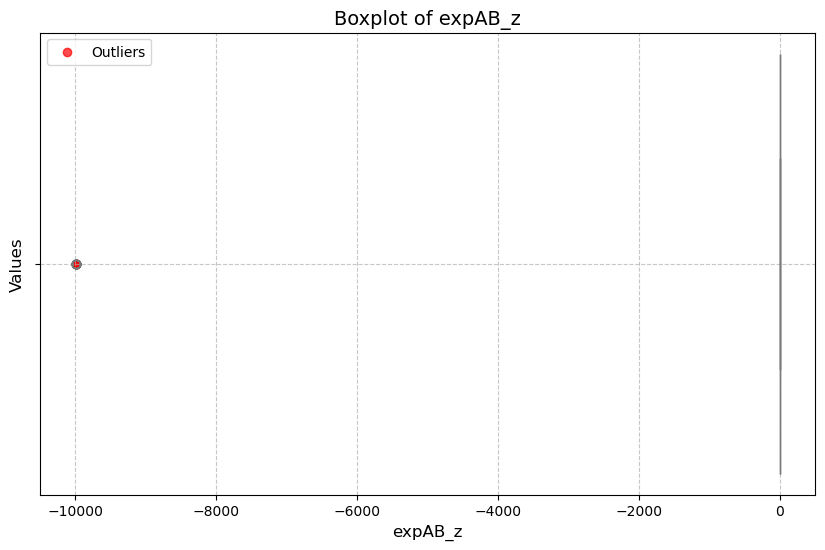

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


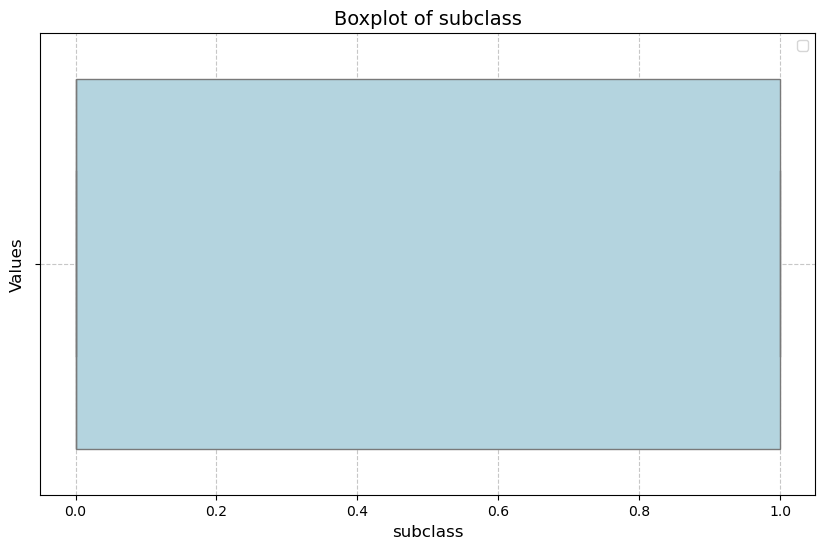

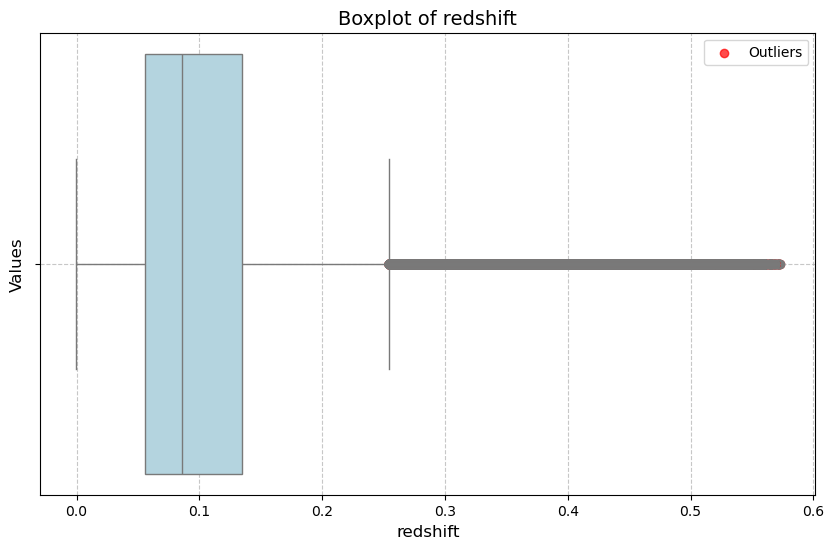

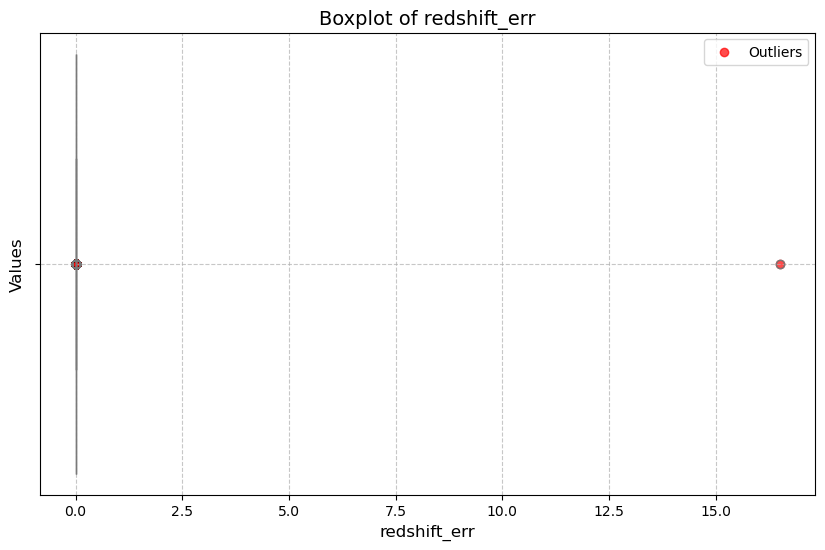

In [14]:
  
# # #In the belows out cells we can see clearly  that there are OUTLIERS VALUES in each columns data Rreprsented BY RED COLOR dot.

# # # some values lie far from the most of the values in the particular columns of the datasets.

def fun(col):
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    if col == 'subclass':
        sns.boxplot(x=col, data=gd, color='lightblue')
    else:
        Q1 = gd[col].quantile(0.25)     #calculatung outliers
        Q3 = gd[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = gd[(gd[col] < lower_bound) | (gd[col] > upper_bound)]

        if outliers.empty:
            print(f'No outliers found in {col}. Skipping plot.')          # Skip plotting if there are no outliers
            plt.close() 
            return
        
        sns.boxplot(x=col, data=gd, color='lightblue')
        plt.scatter(outliers[col], np.zeros_like(outliers[col]), color='red', label='Outliers', alpha=0.7)    #highlighting the outliers with red colur
    
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Values', fontsize=12) 
    plt.grid(True, linestyle='--', alpha=0.7)                                      #adding grid  lines to values
    
    # Add legend
    plt.legend()   
    # Show the plo
    plt.show()
for i in gd.columns:
    fun(i)







***<h3>bivariate Analysis***

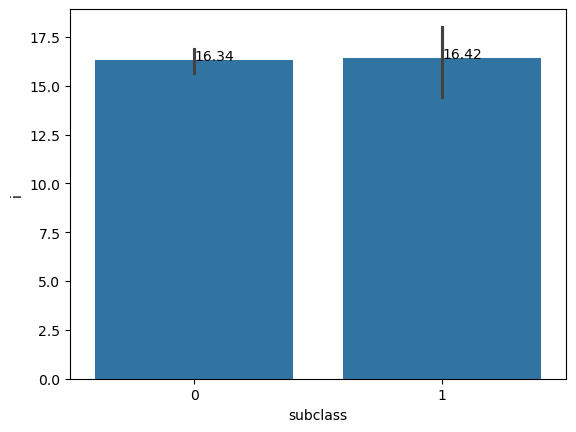

In [15]:
# sns.barplot(x='subclass', y='i', data=gd)

import matplotlib.pyplot as plt

# Create the barplot
ax = sns.barplot(x='subclass', y='i', data=gd)

# Add labels to each bar
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Add text annotation
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}')

# Show the plot
plt.show()

In [16]:
gd['subclass'] = gd['subclass'].astype('category')   #changing subclass  type as categorical type

***<h3>Multivariate Analysis***

**correlation heatmap shows the relation ship between multiple columns in dataset with each other** 

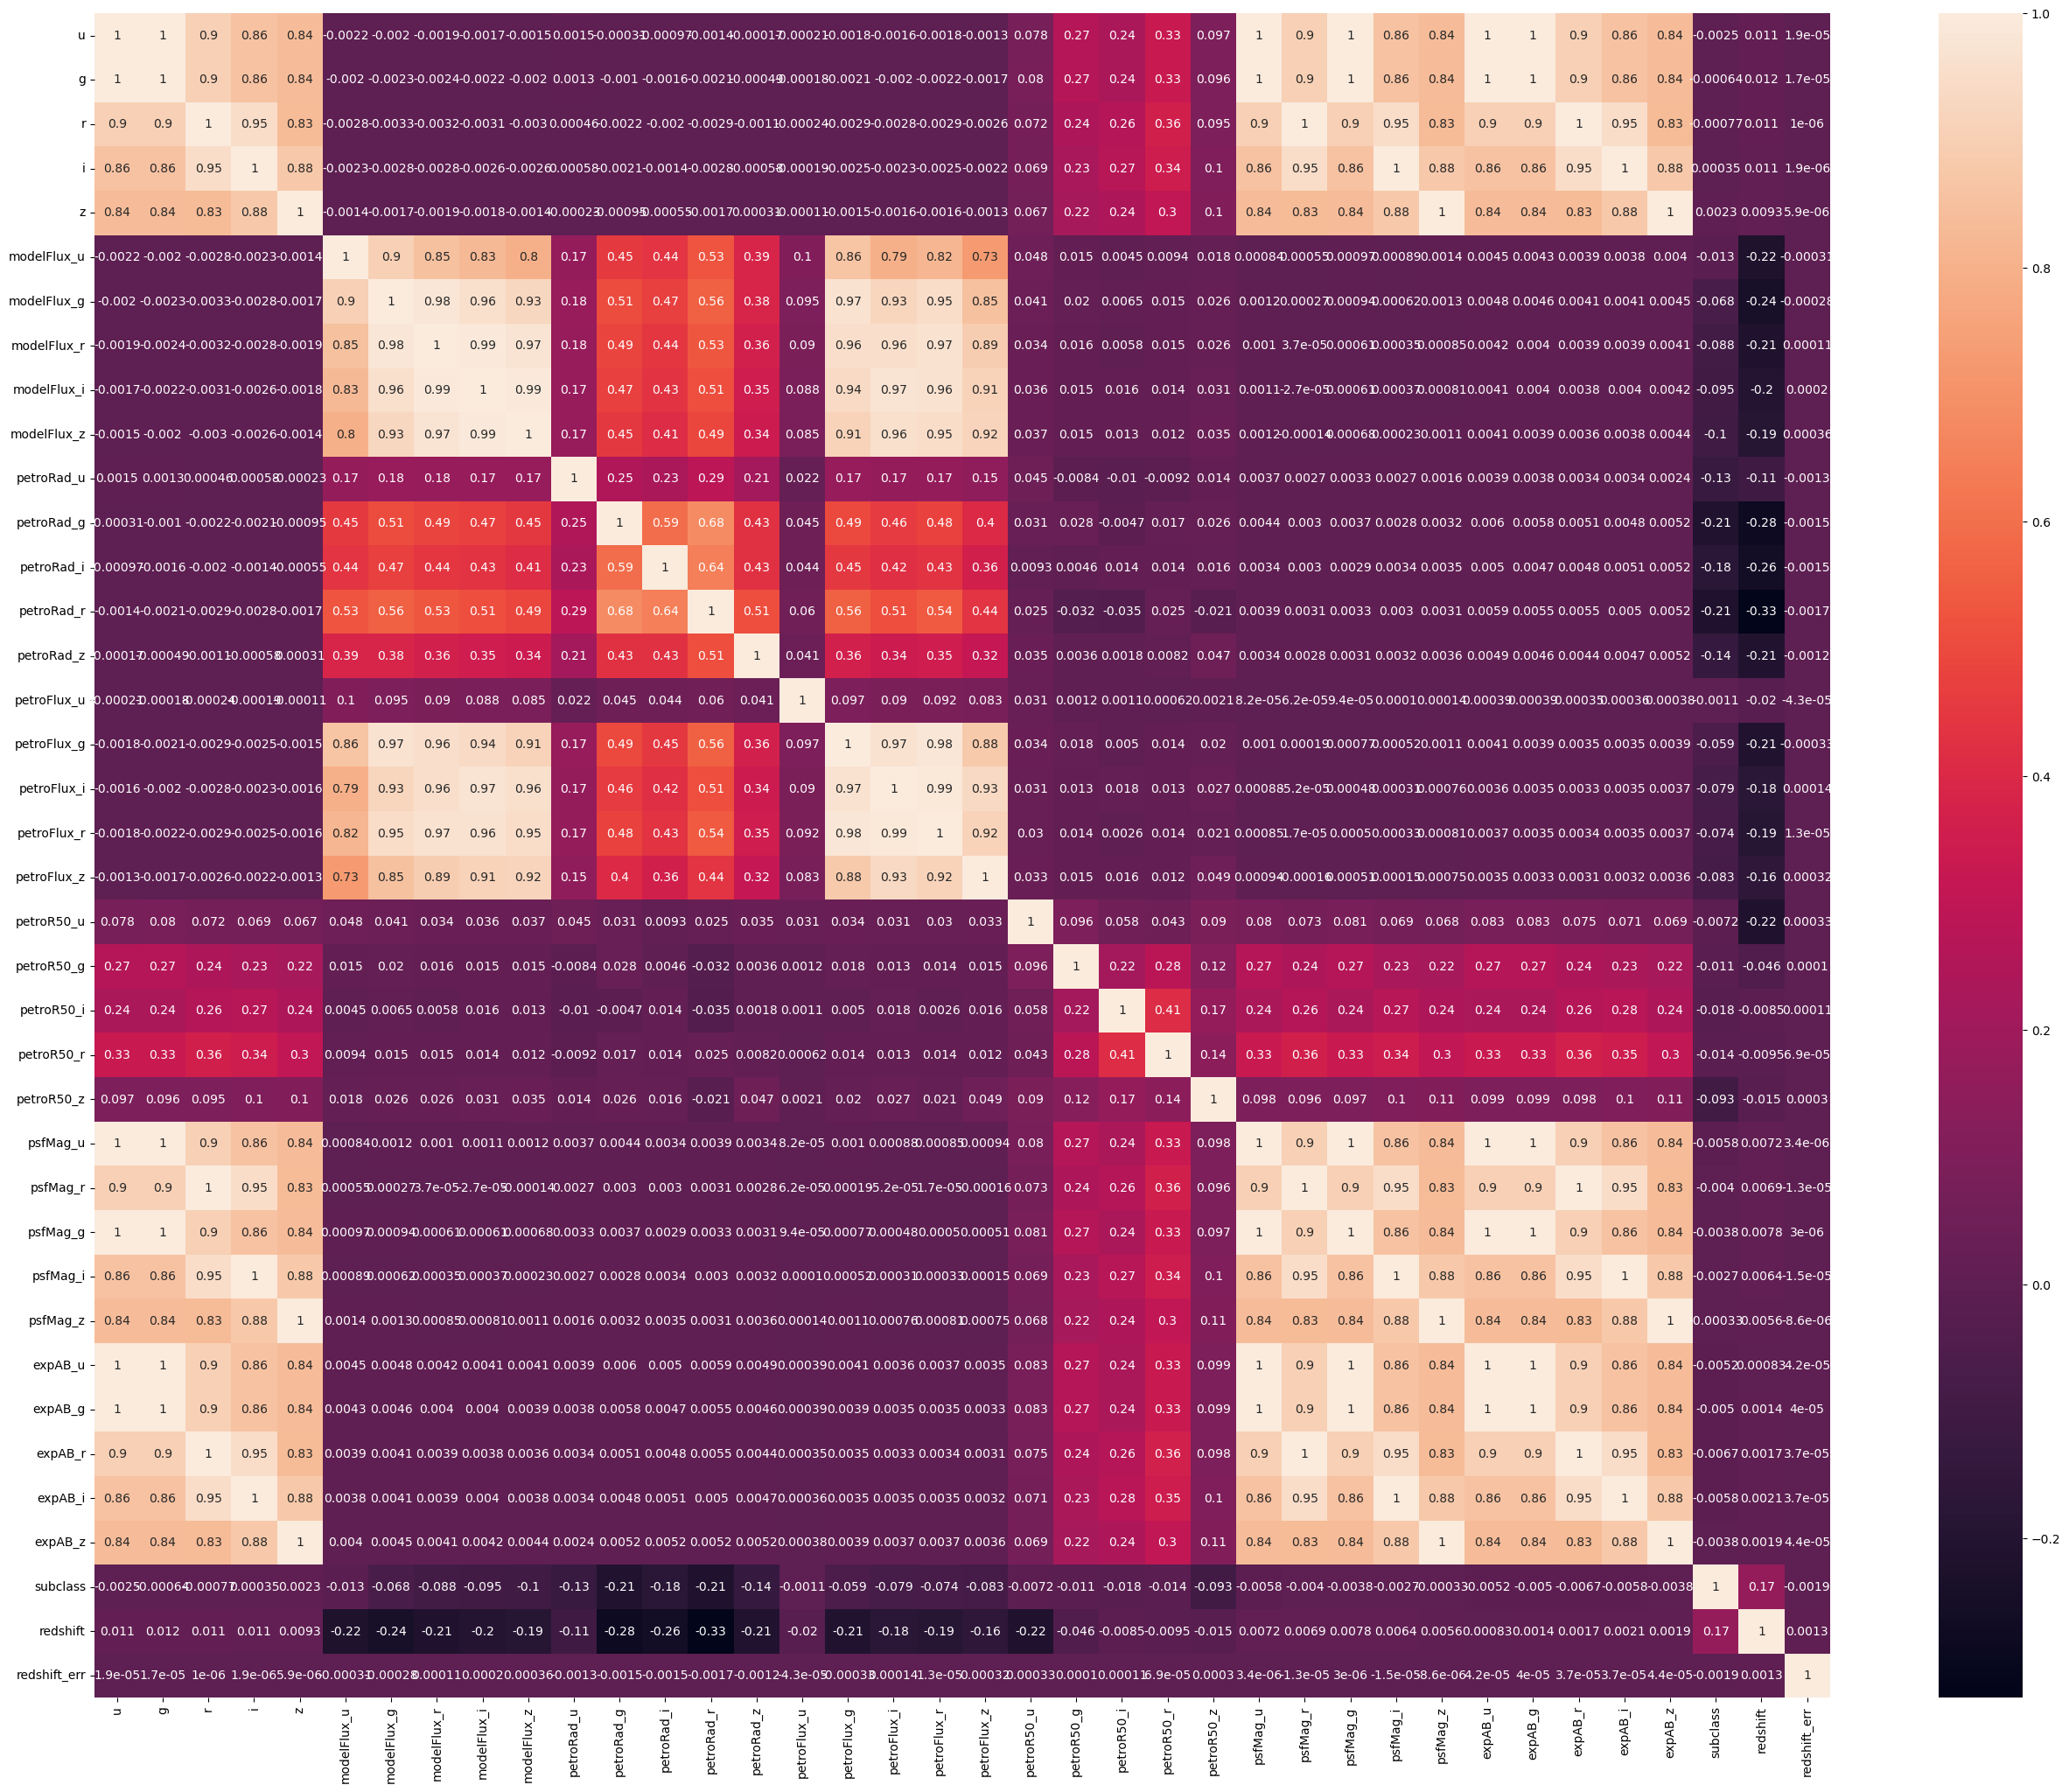

In [17]:
plt.figure(figsize=(32,25))
sns.heatmap(gd.corr(),annot=True)     # heatmap of corrletion btw multiple columns of dataset
plt.show()           

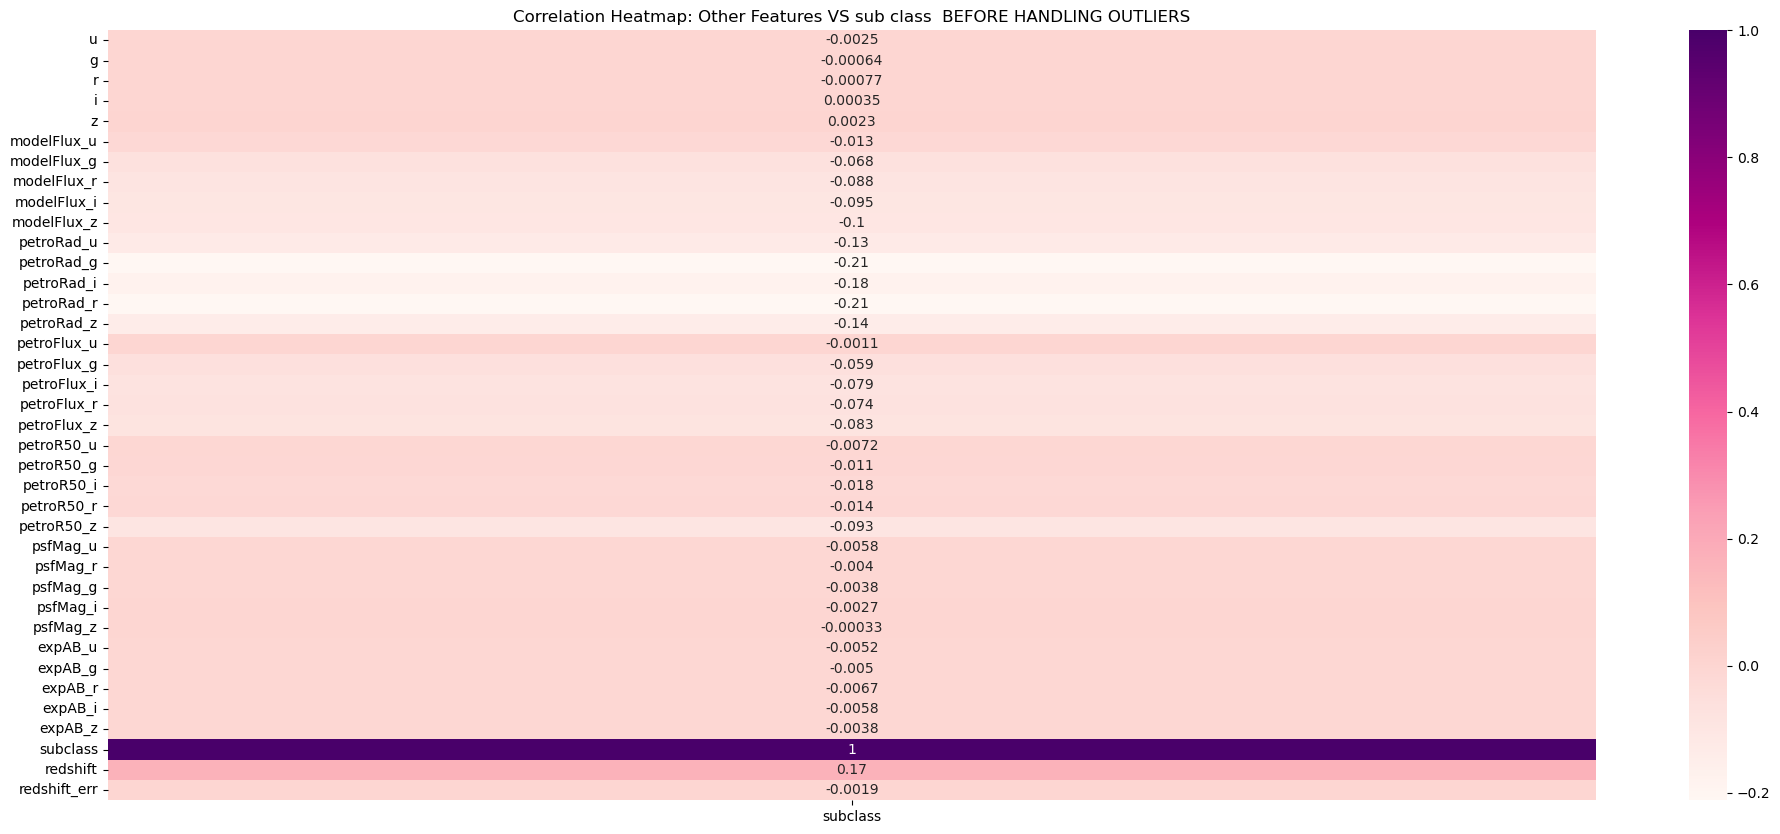

In [18]:

plt.figure(figsize = (24,10))
sns.heatmap(gd.corr()[['subclass']], annot = True, cmap = 'RdPu')
plt.title('Correlation Heatmap: Other Features VS sub class  BEFORE HANDLING OUTLIERS')
plt.show()  


***<b><h4>Handling The Outliers in the dataset columns***<br>

***<h4>Using IQR Method and replacing outliers with the upper and lowerbound values***

In [19]:



def handle_outliers_iqr(gd):
    outliers_count = {}

    # Get list of columns except 'subclass'
    columns = [col for col in gd.columns if col != 'subclass']

    for column in columns:
        Q1 = gd[column].quantile(0.25)
        Q3 = gd[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_before = gd[(gd[column] < lower_bound) | (gd[column] > upper_bound)]
        num_outliers_before = len(outliers_before)

        # Replace outliers with bounds
        gd.loc[gd[column] < lower_bound, column] = lower_bound
        gd.loc[gd[column] > upper_bound, column] = upper_bound

        # Verify no outliers remain
        outliers_after = gd[(gd[column] < lower_bound) | (gd[column] > upper_bound)]
        num_outliers_after = len(outliers_after)

        outliers_count[column] = {
            'before': num_outliers_before,
            'after': num_outliers_after
        }

    return outliers_count

# Handle outliers for all columns except 'subclass'
outliers_count = handle_outliers_iqr(gd)

# Print outliers count before and after
for column, counts in outliers_count.items():
    print(f'Column: {column}')
    print(f'  Number of outliers before: {counts["before"]}')
    print(f'  Number of outliers after: {counts["after"]}')



     





Column: u
  Number of outliers before: 10129
  Number of outliers after: 0
Column: g
  Number of outliers before: 16014
  Number of outliers after: 0
Column: r
  Number of outliers before: 16985
  Number of outliers after: 0
Column: i
  Number of outliers before: 15606
  Number of outliers after: 0
Column: z
  Number of outliers before: 13185
  Number of outliers after: 0
Column: modelFlux_u
  Number of outliers before: 8626
  Number of outliers after: 0
Column: modelFlux_g
  Number of outliers before: 9235
  Number of outliers after: 0
Column: modelFlux_r
  Number of outliers before: 9660
  Number of outliers after: 0
Column: modelFlux_i
  Number of outliers before: 9370
  Number of outliers after: 0
Column: modelFlux_z
  Number of outliers before: 9190
  Number of outliers after: 0
Column: petroRad_u
  Number of outliers before: 8888
  Number of outliers after: 0
Column: petroRad_g
  Number of outliers before: 4756
  Number of outliers after: 0
Column: petroRad_i
  Number of outliers

**Dataset after handling the outliers**

In [20]:
gd

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.738180,20.266330,19.324090,18.640370,18.238330,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0,0.067749,0.000015
1,20.667610,19.320160,18.678880,18.246930,18.041220,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0,0.105118,0.000010
2,22.055353,20.381655,19.469026,19.190979,18.683960,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0,0.234089,0.000027
3,20.123740,18.415200,17.472020,17.052970,16.724230,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0,0.110825,0.000027
4,16.786332,15.780395,18.377620,18.133830,17.784970,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-0.299861,-0.156445,0.050000,0.050000,0.149973,0,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.092880,18.253750,17.289850,16.829030,16.430540,9.177956,49.945560,121.35520,185.51900,267.78230,...,18.36605,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,0,0.116555,0.000022
99996,22.055353,20.381655,19.024620,18.432250,17.967950,1.432706,4.673576,24.55518,42.37332,64.97742,...,19.84113,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,0,0.254116,0.000027
99997,19.316220,18.149440,17.455170,17.044350,16.771270,18.770960,54.982040,104.21510,152.14590,195.65200,...,19.11502,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,0,0.127064,0.000010
99998,19.038560,18.176190,17.531190,17.055320,16.851660,24.241610,53.644460,97.16785,150.61570,181.68840,...,18.01613,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,0,0.116330,0.000011


In [21]:
gd.describe()      #after handling outliers

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,19.537485,18.219926,17.555735,17.199515,16.999612,22.852574,72.999025,127.890347,180.034557,225.437498,...,19.917642,19.007251,18.711693,0.496190,0.577762,0.590437,0.589736,0.558884,0.105222,0.000013
std,1.275336,1.189664,1.092683,1.114263,1.189552,18.695729,57.774073,98.312716,139.267102,179.684176,...,1.003203,1.046764,1.060022,0.253863,0.234104,0.225927,0.226441,0.240620,0.068269,0.000006
min,16.786332,15.780395,15.356736,14.928769,14.522547,-23.669111,-11.935840,-42.440640,-54.385510,-144.460200,...,17.531294,16.359203,16.029861,-0.299861,-0.156445,-0.113913,-0.113038,-0.175247,-0.000833,0.000002
25%,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,91.777325,104.256550,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,145.664550,180.086150,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,244.944825,307.044675,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000016
max,22.055353,20.381655,19.469026,19.190979,19.212628,64.216871,196.900684,333.642198,474.696075,611.226862,...,22.135264,21.523002,21.261171,1.000000,1.000000,0.999999,1.000000,0.999998,0.254116,0.000027


***Creating box  plot of each columns AFTER  handling  the outliers***

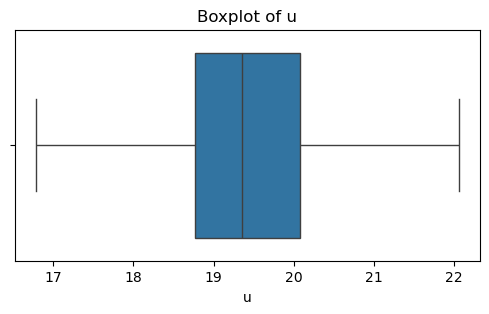

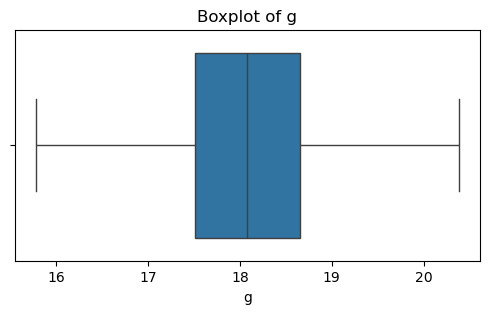

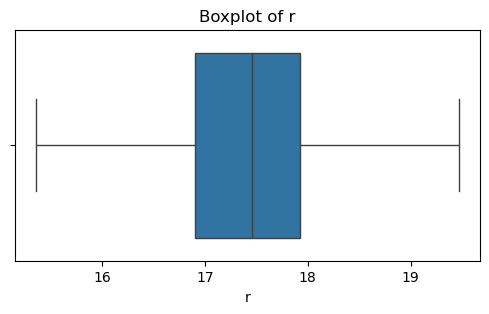

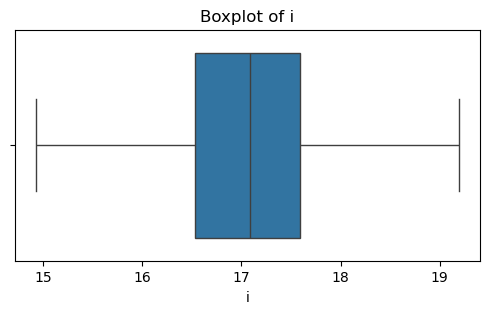

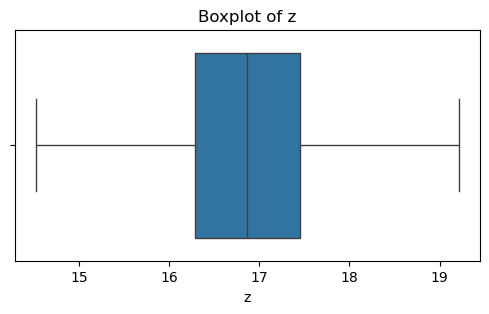

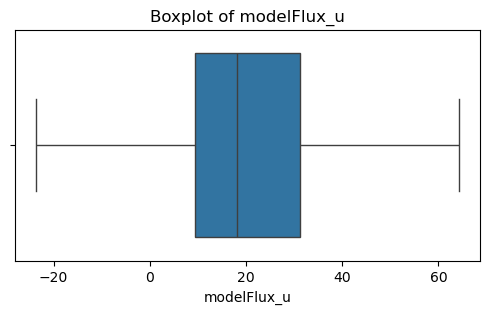

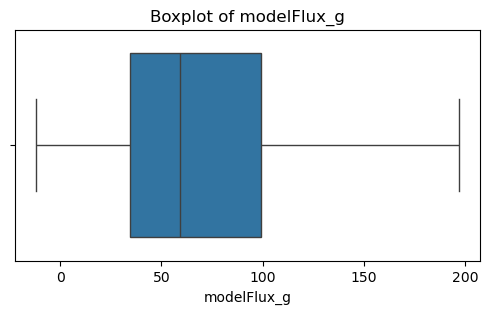

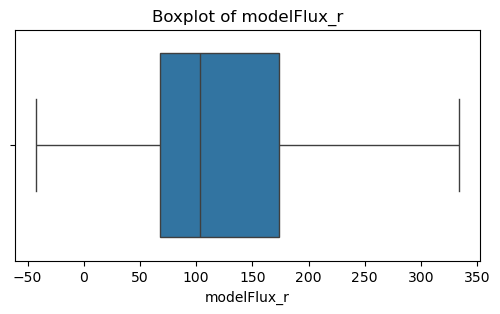

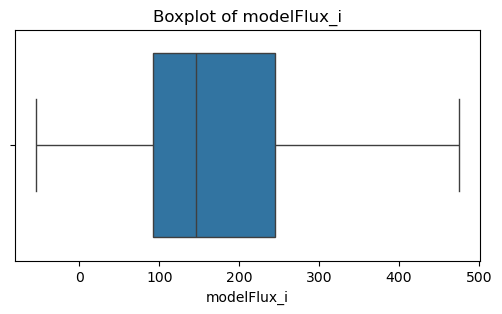

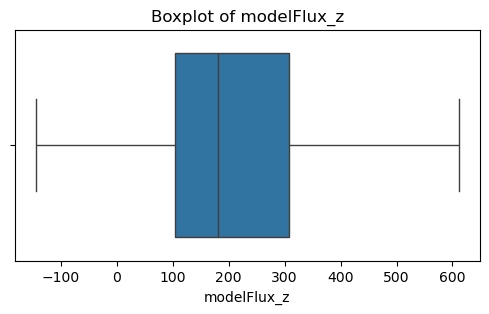

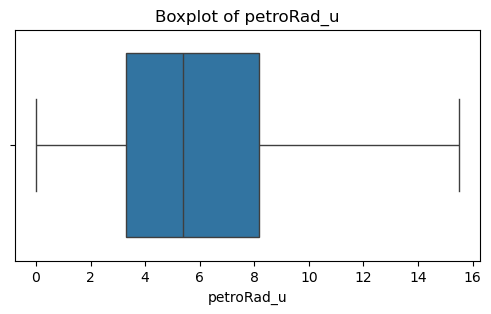

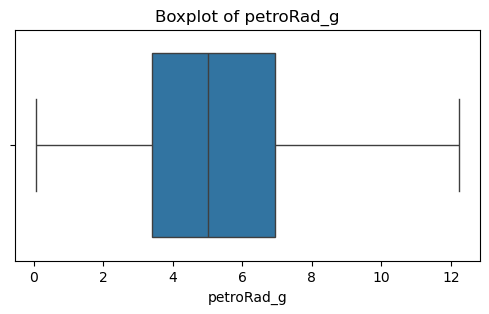

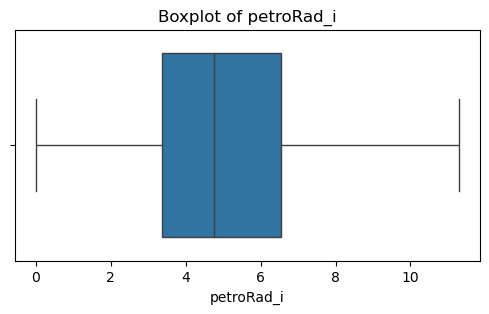

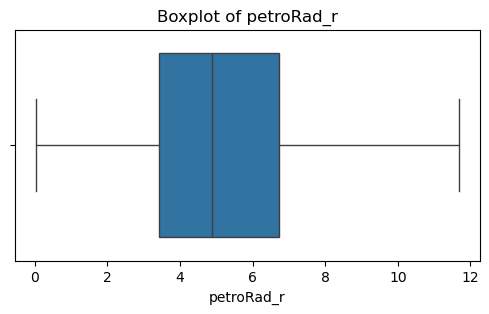

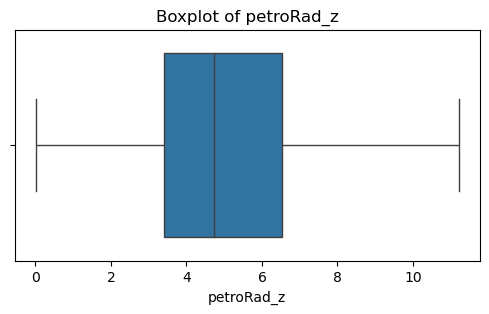

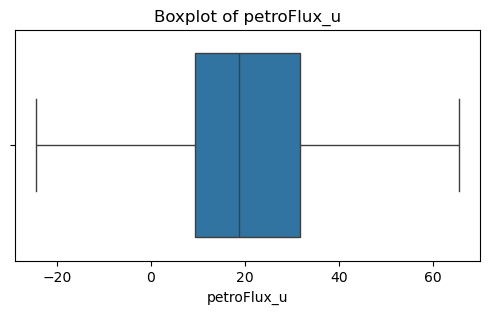

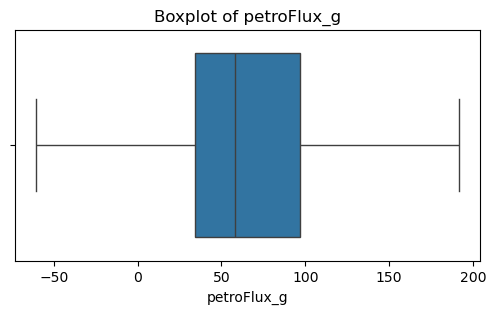

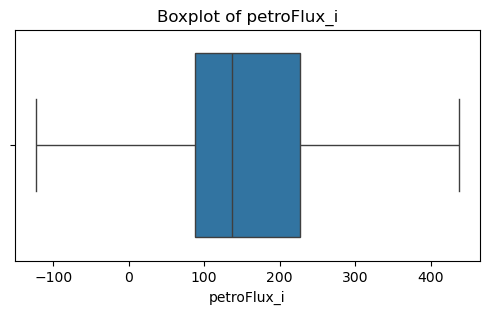

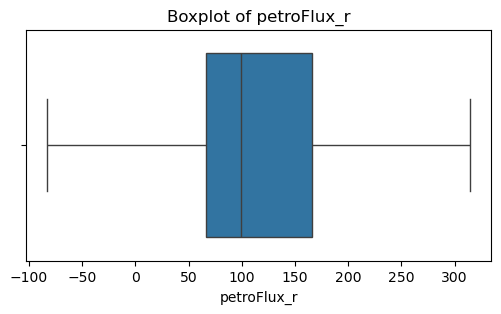

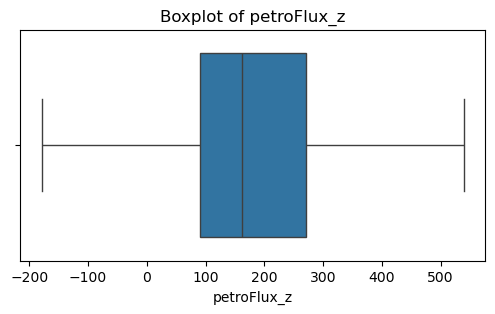

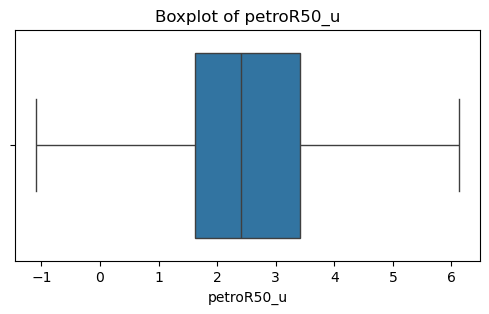

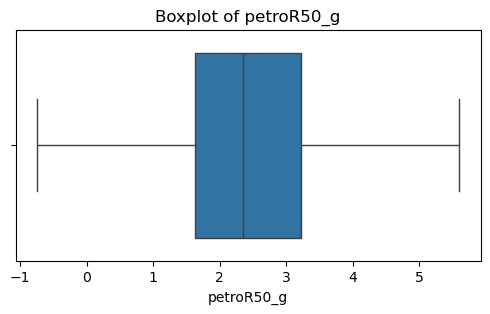

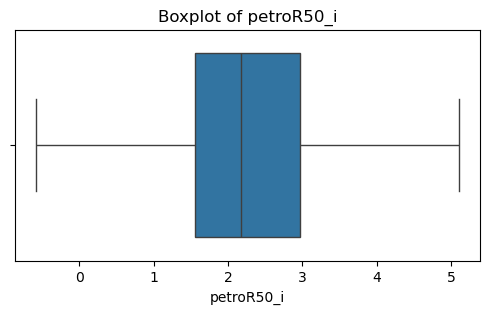

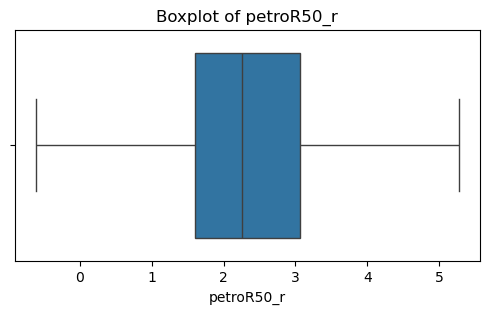

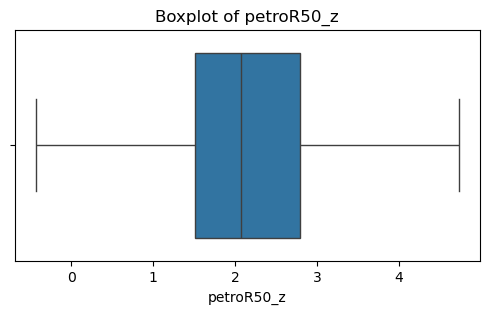

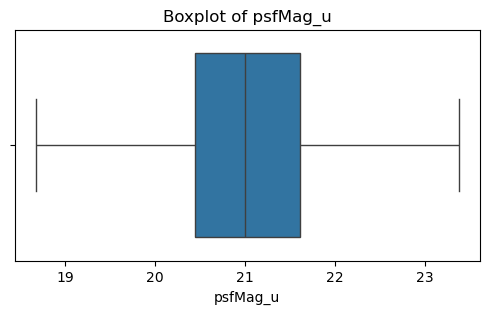

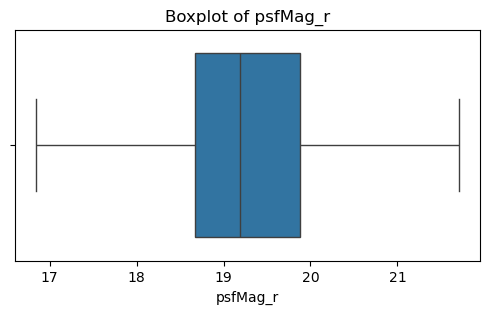

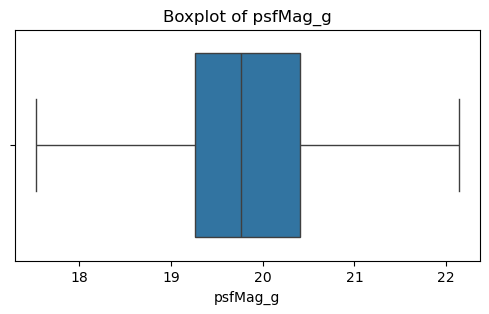

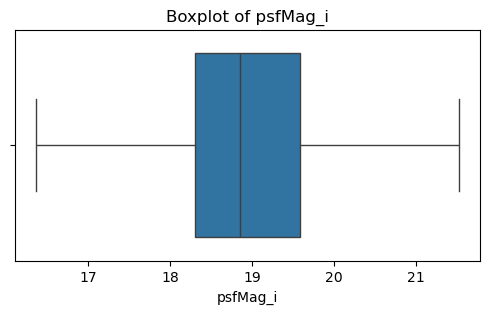

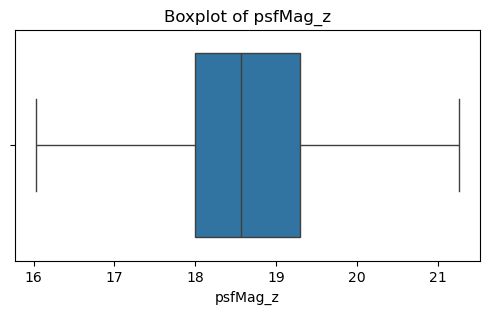

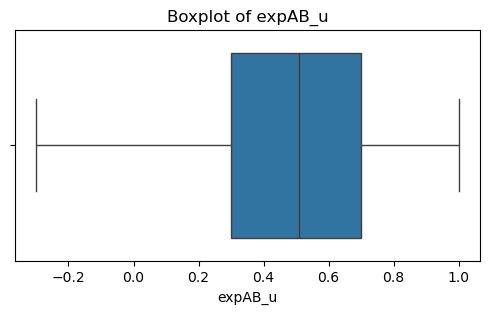

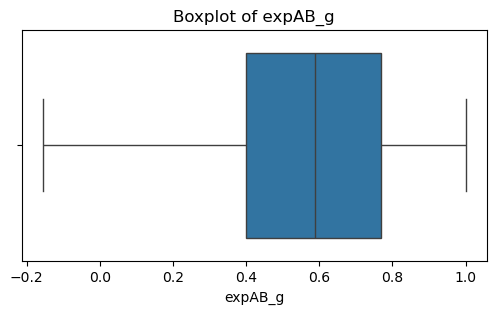

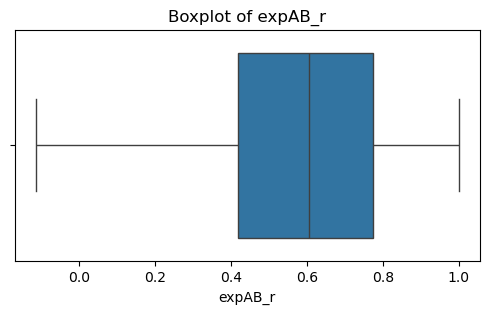

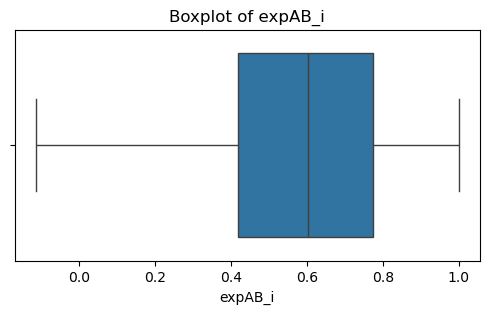

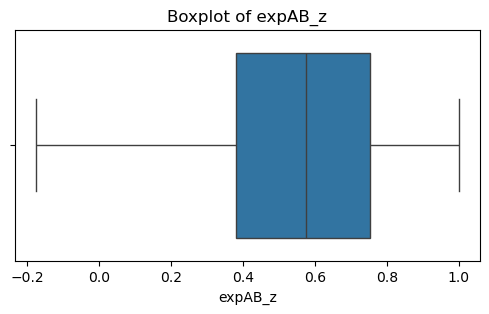

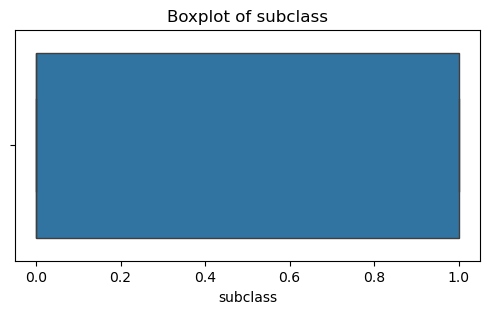

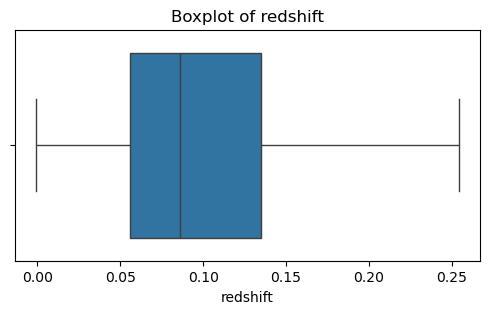

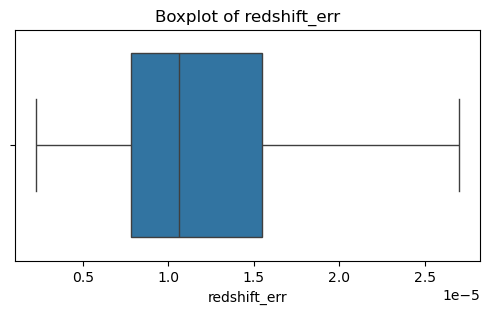

In [22]:

# Create a boxplot for each column
for column in gd.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=gd[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


***<H4>Heatmap for correlation between SUBCLASS and OTHER COLUMNS AFTER handling outliers***

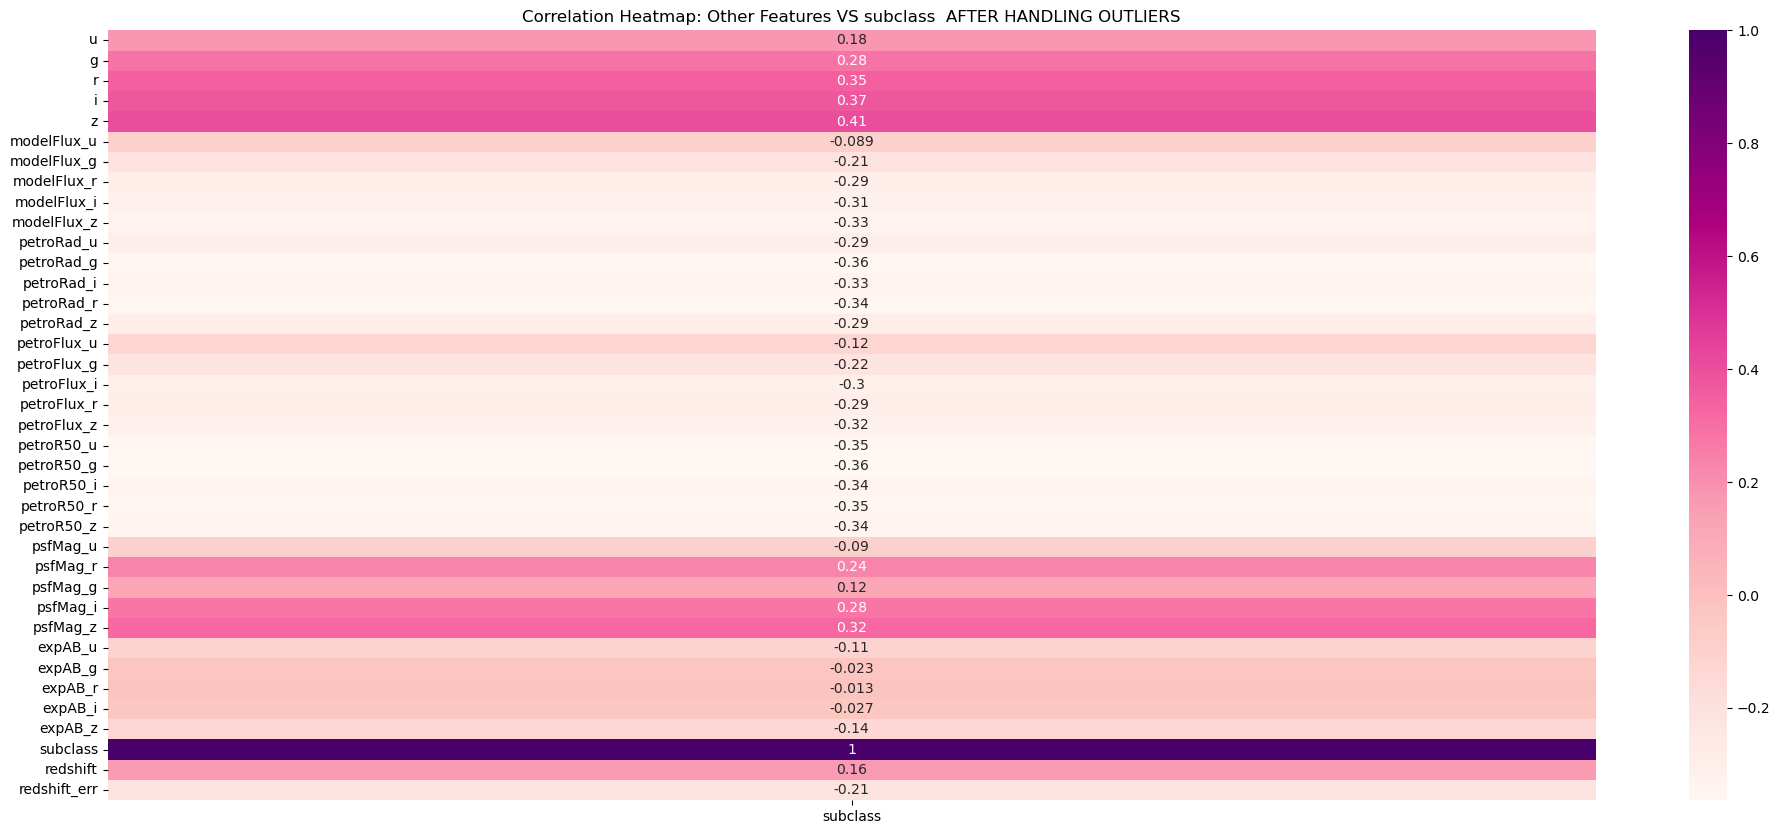

In [23]:


# heatmap after handling outliers
       
plt.figure(figsize = (24,10))
sns.heatmap(gd.corr()[['subclass']], annot = True, cmap = 'RdPu')
plt.title('Correlation Heatmap: Other Features VS subclass  AFTER HANDLING OUTLIERS')
plt.show()



In [24]:
gd

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
0,21.738180,20.266330,19.324090,18.640370,18.238330,2.007378,7.823640,18.63581,34.98175,50.64961,...,20.07646,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,0,0.067749,0.000015
1,20.667610,19.320160,18.678880,18.246930,18.041220,5.403369,18.703640,33.76298,50.25997,60.73625,...,19.19277,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,0,0.105118,0.000010
2,22.055353,20.381655,19.469026,19.190979,18.683960,0.295693,3.318924,10.73388,18.80136,33.58972,...,20.00731,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,0,0.234089,0.000027
3,20.123740,18.415200,17.472020,17.052970,16.724230,8.920645,43.044740,102.61010,150.94260,204.31610,...,18.38868,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,0,0.110825,0.000027
4,16.786332,15.780395,18.377620,18.133830,17.784970,0.000000,0.000000,44.56038,55.77801,76.90784,...,19.09511,19.02880,-0.299861,-0.156445,0.050000,0.050000,0.149973,0,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.092880,18.253750,17.289850,16.829030,16.430540,9.177956,49.945560,121.35520,185.51900,267.78230,...,18.36605,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,0,0.116555,0.000022
99996,22.055353,20.381655,19.024620,18.432250,17.967950,1.432706,4.673576,24.55518,42.37332,64.97742,...,19.84113,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,0,0.254116,0.000027
99997,19.316220,18.149440,17.455170,17.044350,16.771270,18.770960,54.982040,104.21510,152.14590,195.65200,...,19.11502,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,0,0.127064,0.000010
99998,19.038560,18.176190,17.531190,17.055320,16.851660,24.241610,53.644460,97.16785,150.61570,181.68840,...,18.01613,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,0,0.116330,0.000011


***<h3>Selecting  Best K features from the 38 columns for better prediction***

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define your features and target
x = gd.drop(['subclass'], axis=1)
y = gd['subclass']

selector = SelectKBest(score_func=f_classif, k=10)

x_selected = selector.fit_transform(x, y)

selected_features = x.columns[selector.get_support()]

print("The selected features are:", selected_features)

The selected features are: Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')


***Checking the Balance OF value count  0 and 1 in subclass column***

In [26]:
pd.Series(y).value_counts()

subclass
0    74993
1    25007
Name: count, dtype: int64

***<h3>Balancing Value count Using SMOTE***

***<i>we can see in above  output cell clearly that their is imbalance of class  btw 0 & 1  in  SUBCLASS column***<br>

***so we have  to resampled the dataset values using SMOTE method  that improve  robustness of machine learning***

In [27]:
smote =SMOTE(random_state=8)

#smote oversampling
x_resampled,y_resampled =smote.fit_resample(x,y)

#new value count
pd.Series(y_resampled).value_counts()

subclass
0    74993
1    74993
Name: count, dtype: int64

***<H4>Merging resampled datasets in on one***

In [28]:

X_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)

y_resampled_series = pd.Series(y_resampled, name='subclass')

# Combining X_resampled and y_resampled into a single DataFrame
gd = pd.concat([X_resampled_df, y_resampled_series], axis=1)

***<h4>Shuffling for random distribustion  of subclass value in Dataset***

In [29]:

gd=gd.sample(frac=1, random_state=42).reset_index(drop=True)

gd.head(10)

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,subclass
0,21.911345,20.381655,19.469026,19.190979,19.212628,1.699200,3.165804,3.770585,4.432036,4.907859,...,21.018586,20.870982,0.155005,0.469546,0.277277,0.584996,0.204030,0.054022,0.000010,1
1,19.110724,17.992812,17.523846,17.244348,17.082543,22.684961,63.522830,97.829064,126.550280,146.902602,...,19.513619,19.285434,0.815001,0.916070,0.880068,0.916652,0.860198,0.116473,0.000008,1
2,19.334131,18.893479,18.608183,18.355000,18.604294,18.489567,27.713345,36.047128,45.499158,36.329556,...,18.731611,19.000138,0.492316,0.501004,0.466374,0.580123,0.524303,0.171248,0.000008,1
3,22.055353,20.381655,19.469026,19.190979,19.212628,0.935100,1.316495,2.675847,3.921688,5.864829,...,21.125210,20.744510,0.150004,0.119874,0.050000,0.086842,0.120521,0.254116,0.000027,0
4,18.932378,18.153965,18.363139,18.277883,18.258066,26.738969,54.989670,45.160665,48.900581,49.754928,...,18.881285,18.864487,0.830969,0.823407,0.783350,0.763042,0.830895,0.035467,0.000006,1
5,19.093723,18.057532,17.644131,17.325630,17.195151,23.153848,59.852173,87.574344,117.422352,132.412818,...,19.164818,19.051385,0.432736,0.503233,0.512729,0.465603,0.476184,0.087068,0.000006,1
6,18.714580,17.290290,16.623330,16.219590,15.979630,32.670860,121.306700,224.216800,325.210800,405.644200,...,18.395680,17.948880,0.799996,0.799840,0.863421,0.878263,0.958652,0.073408,0.000013,0
7,19.238620,17.757870,17.341630,16.793280,16.738230,20.161960,78.859090,115.703300,191.729300,201.699100,...,19.432200,19.228520,0.600110,0.550015,0.649468,0.553102,0.593431,0.057051,0.000010,0
8,22.055353,20.381655,19.469026,19.190979,19.003950,0.247149,2.130299,7.934741,16.361040,25.005750,...,20.874490,20.563230,0.050000,0.399996,0.726775,0.925551,0.559383,0.254116,0.000027,0
9,18.806402,17.350238,16.644125,16.194525,15.941043,30.023889,114.838262,219.981382,332.804899,420.319593,...,17.740620,17.363428,0.723377,0.609348,0.606575,0.582500,0.587853,0.088485,0.000009,1


***<h3>Splitting the data sets into Train and Test Datasets***<br>

**<h5>By using 10 best features for predicting label**

In [30]:
gd1=gd[['z', 'i', 'petroR50_g', 'petroRad_g', 'petroR50_u', 'r', 'petroR50_r','petroRad_r', 'petroR50_i', 'petroR50_z','subclass']]


from sklearn.model_selection import train_test_split

X=gd1[['z', 'i', 'petroR50_g', 'petroRad_g', 'petroR50_u', 'r', 'petroR50_r','petroRad_r', 'petroR50_i', 'petroR50_z']]
Y=gd1[['subclass']]

X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
gd1.head(15)

,z,i,petroR50_g,petroRad_g,petroR50_u,r,petroR50_r,petroRad_r,petroR50_i,petroR50_z,subclass
0,19.212628,19.190979,0.625472,1.213030,0.599422,19.469026,0.606114,1.145685,0.598048,0.593171,1
1,17.082543,17.244348,2.978113,5.847554,3.252429,17.523846,2.901838,5.964558,2.709824,2.569813,1
2,18.604294,18.355000,1.254060,2.522433,1.242572,18.608183,1.289854,2.591341,1.305459,1.225147,1
3,19.212628,19.190979,0.744320,1.616364,1.512775,19.469026,0.746236,1.510952,0.705767,1.040317,0
4,18.258066,18.277883,0.991996,2.014726,1.049014,18.363139,1.034186,2.161614,1.066107,1.124420,1
5,17.195151,17.325630,2.309330,4.711675,2.384924,17.644131,2.299602,4.650367,2.255023,2.095218,1
6,15.979630,16.219590,3.655254,7.587943,3.839620,16.623330,3.314051,6.866985,3.332796,2.985057,0
7,16.738230,16.793280,4.030897,8.999116,3.919017,17.341630,3.450577,7.625468,4.363671,3.389209,0
8,19.003950,19.190979,1.479828,3.273561,-1.093203,19.469026,1.570570,3.549137,1.781183,2.876484,0
9,15.941043,16.194525,2.221190,4.827317,2.293473,16.644125,2.125136,4.731114,2.018374,2.017995,1


***<h3> FEATURES SCALING   of Train and Test data sets***

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sl_train=scaler.fit_transform(X_train)

sl_test=scaler.transform(x_test)

### <h1><b>MODEL BUILDING PHASE

**We are using three algorithms and pick  best one on the basis of their performance,  is saved for further prediction**<br>

***<h2>1st DECSION TREE CLASSIFIER***

In [32]:
from sklearn.tree import DecisionTreeClassifier 

clf= DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(sl_train, Y_train)

# Make predictions on the testing data

l_train=clf.predict(sl_train)

y_pred = clf.predict(sl_test)

# Evaluate the classifier
report1 = classification_report (l_train, Y_train)

report = classification_report (y_test, y_pred)

print(report1)

print("Classification Report:\n", report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60290
           1       1.00      1.00      1.00     59698

    accuracy                           1.00    119988
   macro avg       1.00      1.00      1.00    119988
weighted avg       1.00      1.00      1.00    119988

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     14962
           1       0.78      0.80      0.79     15036

    accuracy                           0.79     29998
   macro avg       0.79      0.79      0.79     29998
weighted avg       0.79      0.79      0.79     29998



**<h5>Calculating  roc_Auc and accuracy on train and test Datasets  for  model**<br>

**Auc score :: ability of binary classification model to distinguish btw classes. independent of  decision threshold value of  model**<br>

**Accuracy score :: measures propotion of correctly classified instances(both TP and TN) out of total numnber of instances**

In [33]:
#cal.  roc score for train and test models

roc_auc1 =roc_auc_score(Y_train,l_train)
print('Roc_Auc for train',roc_auc1)
roc_auc = roc_auc_score(y_test, y_pred)                    # 
print(f'ROC_AUC for test: {roc_auc:.2f}')


print("")

#calulting accuracy  score  for train and test models
print("train model accuracy:")
train_D=(accuracy_score(l_train,Y_train))
print(train_D)
print('test model accuracy:')
test_D=(accuracy_score(y_pred,y_test))
print(test_D)
print('')
print("delta: ",abs(train_D-test_D))

Roc_Auc for train 0.997840118751772
ROC_AUC for test: 0.79

train model accuracy:
0.9978414508117478
test model accuracy:
0.7879191946129742

delta:  0.20992225619877358


***<h5>As we can see in above  ouput cell that their is big difference between  Roc_ AUC scores and Accuracy scores of Model for  "train Datasets"  and Test Datatsets***<br>


***This indicate that our trained model " l_train " is overfitted on  the training   dataset***

**visual analysis of performance of train and test models by drawing ROC CURVE**

**The above  2 curves show that model is performing supereb on train dataset as (roc value is almost 1) ,but for the test dataset, model does not performing well as compared to the train Dataset of roc value is about 0.80.**

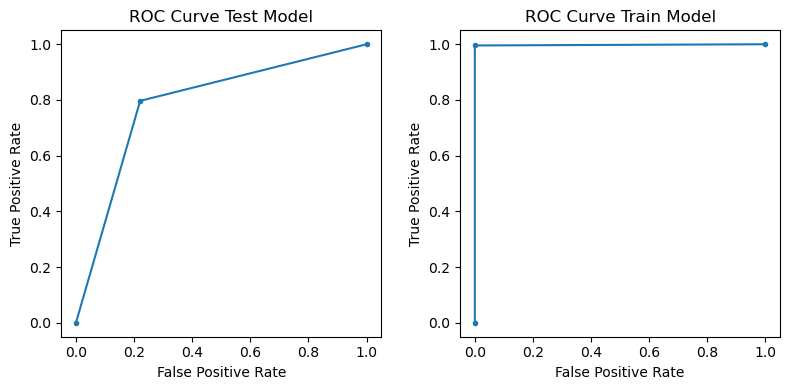

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Generate the ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred)

# Generate the ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(Y_train, l_train)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC curve for test data
axes[0].plot(fpr_test, tpr_test, marker='.')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve Test Model')

# Plot ROC curve for training data
axes[1].plot(fpr_train, tpr_train, marker='.')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve Train Model')

# Adjust layout and show the plot
plt.tight_layout(w_pad=2.0)
plt.show()

***<h3>Testing and solving Overfitting problem  <br> for Decision Tree Classifier***
***By tuning  hyperparameters<br> that help in avoiding overfitting such as "max_depth", 'min_sample_split' and  a random state***

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train a decision tree with pre-pruning constraints
clf1 = DecisionTreeClassifier( max_depth=12, min_samples_split=10,min_samples_leaf=10,  random_state=42)
clf1.fit(sl_train, Y_train)

# Make predictions
l_train = clf1.predict(sl_train)
y_pred = clf1.predict(sl_test)

# Evaluate the classifier
report1 = classification_report(Y_train, l_train)
report = classification_report(y_test, y_pred)

print("Training Classification Report:\n", report1)
print("Testing Classification Report:\n", report)

#calculating roc scores of model

roc_auc1 =roc_auc_score(Y_train,l_train)
print('Roc Auc for train',roc_auc1)
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC for test:', roc_auc)

#Calculating accuracy score of the model
print('')
print("train model accuracy:")
train_D=(accuracy_score(l_train,Y_train))
print(train_D)
print('test model accuracy:')
test_D=(accuracy_score(y_pred,y_test))
print(test_D)
print('')
print("delta of accuracy scores: ",abs(train_D-test_D))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83     60031
           1       0.83      0.84      0.84     59957

    accuracy                           0.83    119988
   macro avg       0.83      0.83      0.83    119988
weighted avg       0.83      0.83      0.83    119988

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     14962
           1       0.80      0.80      0.80     15036

    accuracy                           0.80     29998
   macro avg       0.80      0.80      0.80     29998
weighted avg       0.80      0.80      0.80     29998

Roc Auc for train 0.8349026227259885
ROC AUC for test: 0.7993082075549093

train model accuracy:
0.8349001566823349
test model accuracy:
0.7993199546636442

delta of accuracy scores:  0.03558020201869061


***<h4>After tuning the hyperparameters our model performances is improved for both train and test datasets<br>  as difference between train and test is less than 0.05 which is good for the Model  prediction performance***

<h4><ROC curve for train and test datasets after solving overfitting issue>

***<h5>Roc Curve of  model on Train and test data***

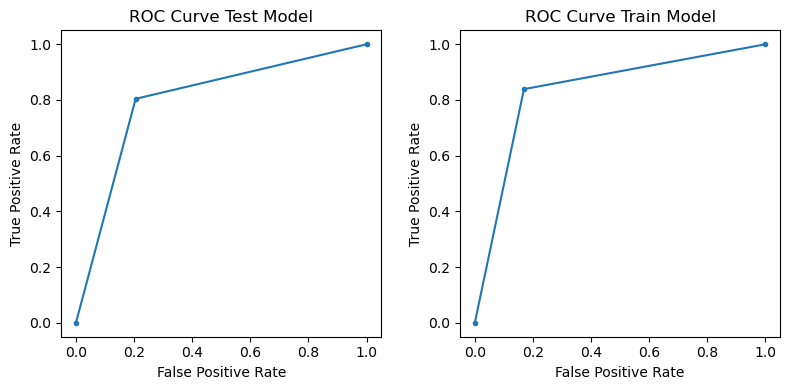

In [36]:

# Generate the ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred)

# Generate the ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(Y_train, l_train)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC curve for test data
axes[0].plot(fpr_test, tpr_test, marker='.')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve Test Model')

# Plot ROC curve for training data
axes[1].plot(fpr_train, tpr_train, marker='.')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve Train Model')

# Adjust layout and show the plot
plt.tight_layout(w_pad=2.0)
plt.show()


***<h2>2nd Logistic Regression Classifiers***

In [67]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score

lg=LogisticRegression()

log=lg.fit(sl_train,Y_train)

ltrain=lg.predict(sl_train)

y_pred=lg.predict(sl_test)

print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))

print(".......................................................")

print("Classification report:\n", classification_report(y_test, y_pred))


roc_auc1 =roc_auc_score(Y_train,ltrain)
print('train Roc auc score',roc_auc1)

roc_auc = roc_auc_score(y_test, y_pred)
print( 'test ROC AUC score:', roc_auc)

print()
print( "Acuuracy for train: ",accuracy_score(ltrain,Y_train))
print(" Accuracy for test: ",accuracy_score(y_pred,y_test))

print()
print("delta of roc_auc scores: ",abs(roc_auc1-roc_auc))

Confusion Matrix: 
 [[12339  2623]
 [ 3122 11914]]
.......................................................
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     14962
           1       0.82      0.79      0.81     15036

    accuracy                           0.81     29998
   macro avg       0.81      0.81      0.81     29998
weighted avg       0.81      0.81      0.81     29998

train Roc auc score 0.8075131092649015
test ROC AUC score: 0.8085271016805579

Acuuracy for train:  0.8075224189085575
 Accuracy for test:  0.8084872324821655

delta of roc_auc scores:  0.0010139924156563618


***<h4>Here the "delta score " is less than 0.01 means model is performing perfectly on unseen datasets***

***<h5>ROC Curve for Logistic Regression***

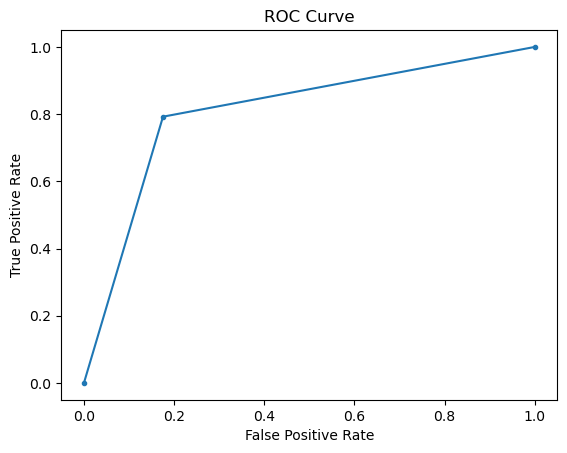

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

***<h2>3rd Random Forest Classifier***

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier

RF = RandomForestClassifier()

RF.fit(sl_train, Y_train)

RFtrain =RF.predict(sl_train)

RFtest =RF.predict(sl_test)

# Print classification report confusion matrix ,
print('train:')
print(confusion_matrix (RFtrain, Y_train))
print('test:')
print(confusion_matrix (RFtest,y_test))
print('train report:')
print( classification_report (RFtrain, Y_train))
print('test report:')
print(classification_report (RFtest,y_test))

roc__auc1=roc_auc_score(Y_train,RFtrain)
roc__auc = roc_auc_score(y_test, RFtest)
print(f'ROC AUC train: {roc__auc1:.2f}')
print('ROC AUC train:' ,roc__auc)

print("delta of roc scores:",abs(roc__auc1-roc__auc))

print()
print('accuracy for train ',accuracy_score(RFtrain,Y_train))
print('accuracy for test',accuracy_score(RFtest,y_test))

train:
[[60031   260]
 [    0 59697]]
test:
[[12763  2253]
 [ 2199 12783]]
train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60291
           1       1.00      1.00      1.00     59697

    accuracy                           1.00    119988
   macro avg       1.00      1.00      1.00    119988
weighted avg       1.00      1.00      1.00    119988

test report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     15016
           1       0.85      0.85      0.85     14982

    accuracy                           0.85     29998
   macro avg       0.85      0.85      0.85     29998
weighted avg       0.85      0.85      0.85     29998

ROC AUC train: 1.00
ROC AUC train: 0.851593643508487
delta of roc scores: 0.14623813593344637

accuracy for train  0.9978331166449979
accuracy for test 0.8515901060070671


**our Random forest Classifier is overfitted on the trained dataset because "Delta of Roc_Auc score is almost 0.15"  that is huge difference for any model** 

***<h3>By analysis above performance mertics we can conlude that our model is overfitted on the train dataset and <br>perform excellent on it But  on test dataset it perform poorly as compare to train data set.***

**visualize roc curve for random forest classifier**

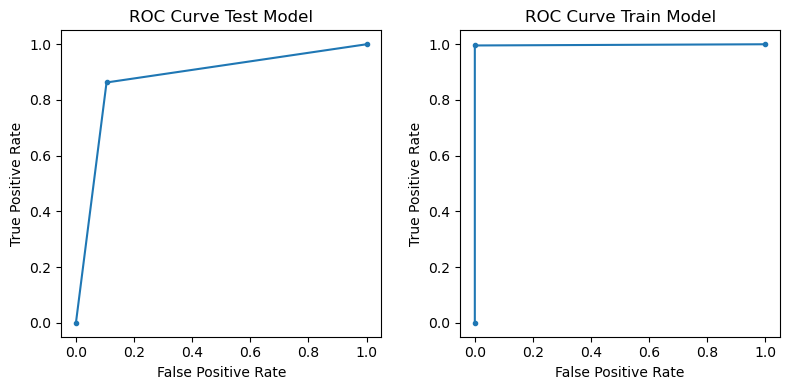

In [40]:

# Generate the ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(RFtest, y_pred)

# Generate the ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(Y_train, RFtrain)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC curve for test data
axes[0].plot(fpr_test, tpr_test, marker='.')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve Test Model')

# Plot ROC curve for training data
axes[1].plot(fpr_train, tpr_train, marker='.')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve Train Model')

# Adjust layout and show the plot
plt.tight_layout(w_pad=2.0)
plt.show()


***<h4>Improving our model performanace and avioding Overfitting  by tuning some hyperparamters of the <br>random forest such as max_depth,         min_sample_leaf,   min_sample_split ,   random state*** 

***<b><h3>Improved model of Random Forest Classifier***

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier

RF1 = RandomForestClassifier( max_depth=14,min_samples_split=10, min_samples_leaf=10,random_state=42 )

RF1.fit(sl_train, Y_train)

RFtrain =RF1.predict(sl_train)

RFtest =RF1.predict(sl_test)

# Print classification report confusion matrix ,

print(confusion_matrix (RFtrain, Y_train))

print(confusion_matrix (RFtest,y_test))

print(classification_report (RFtrain, Y_train))

print(classification_report (RFtest,y_test))

roc__auc1=roc_auc_score(Y_train,RFtrain)
roc__auc = roc_auc_score(y_test, RFtest)
print('ROC AUC train:' ,roc__auc1)
print('ROC AUC test:',roc__auc)
print("delta of roc_auc scores:",abs(roc__auc1-roc__auc))
print()
print('accuracy for train ',accuracy_score(RFtrain,Y_train))
print('accuracy for test',accuracy_score(RFtest,y_test))


[[52120  9296]
 [ 7911 50661]]
[[12487  2904]
 [ 2475 12132]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     61416
           1       0.84      0.86      0.85     58572

    accuracy                           0.86    119988
   macro avg       0.86      0.86      0.86    119988
weighted avg       0.86      0.86      0.86    119988

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     15391
           1       0.81      0.83      0.82     14607

    accuracy                           0.82     29998
   macro avg       0.82      0.82      0.82     29998
weighted avg       0.82      0.82      0.82     29998

ROC AUC train: 0.8565868194000551
ROC AUC test: 0.8207222329555705
delta of roc_auc scores: 0.03586458644448465

accuracy for train  0.8565939927326066
accuracy for test 0.8206880458697247


***<h4>ROC  Curve***

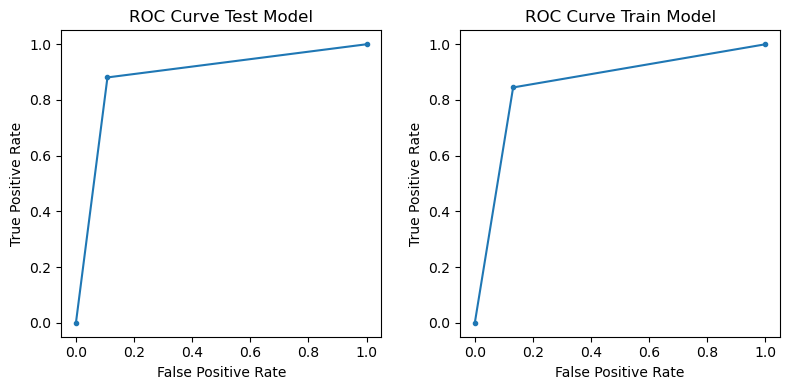

In [42]:

# ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(RFtest, y_pred)

#  the ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(Y_train, RFtrain)

#  figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC curve for test data
axes[0].plot(fpr_test, tpr_test, marker='.')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve Test Model')

# Plot ROC curve for training data
axes[1].plot(fpr_train, tpr_train, marker='.')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve Train Model')

# Adjust layout and show the plot
plt.tight_layout(w_pad=2.0)
plt.show()

<h1><b>MODEL DEPLOYMENT PHASE***

***<h3>From the above three models our Random Forest Model perform better that other two  models on different performance metrics*** 

**<h3>Save the Model**

In [43]:
# import pickle
# pickle.dump(clf,open("clf.pkl","wb"))

**<h3>Test The Model**

In [44]:
# Features that we  have selected for the prediction

#['z', 'i', 'petroR50_g', 'petroRad_g', 'petroR50_u', 'r', 'petroR50_r','petroRad_r', 'petroR50_i', 'petroR50_z']


In [45]:
gd.head(15)

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,subclass
0,21.911345,20.381655,19.469026,19.190979,19.212628,1.699200,3.165804,3.770585,4.432036,4.907859,...,21.018586,20.870982,0.155005,0.469546,0.277277,0.584996,0.204030,0.054022,0.000010,1
1,19.110724,17.992812,17.523846,17.244348,17.082543,22.684961,63.522830,97.829064,126.550280,146.902602,...,19.513619,19.285434,0.815001,0.916070,0.880068,0.916652,0.860198,0.116473,0.000008,1
2,19.334131,18.893479,18.608183,18.355000,18.604294,18.489567,27.713345,36.047128,45.499158,36.329556,...,18.731611,19.000138,0.492316,0.501004,0.466374,0.580123,0.524303,0.171248,0.000008,1
3,22.055353,20.381655,19.469026,19.190979,19.212628,0.935100,1.316495,2.675847,3.921688,5.864829,...,21.125210,20.744510,0.150004,0.119874,0.050000,0.086842,0.120521,0.254116,0.000027,0
4,18.932378,18.153965,18.363139,18.277883,18.258066,26.738969,54.989670,45.160665,48.900581,49.754928,...,18.881285,18.864487,0.830969,0.823407,0.783350,0.763042,0.830895,0.035467,0.000006,1
5,19.093723,18.057532,17.644131,17.325630,17.195151,23.153848,59.852173,87.574344,117.422352,132.412818,...,19.164818,19.051385,0.432736,0.503233,0.512729,0.465603,0.476184,0.087068,0.000006,1
6,18.714580,17.290290,16.623330,16.219590,15.979630,32.670860,121.306700,224.216800,325.210800,405.644200,...,18.395680,17.948880,0.799996,0.799840,0.863421,0.878263,0.958652,0.073408,0.000013,0
7,19.238620,17.757870,17.341630,16.793280,16.738230,20.161960,78.859090,115.703300,191.729300,201.699100,...,19.432200,19.228520,0.600110,0.550015,0.649468,0.553102,0.593431,0.057051,0.000010,0
8,22.055353,20.381655,19.469026,19.190979,19.003950,0.247149,2.130299,7.934741,16.361040,25.005750,...,20.874490,20.563230,0.050000,0.399996,0.726775,0.925551,0.559383,0.254116,0.000027,0
9,18.806402,17.350238,16.644125,16.194525,15.941043,30.023889,114.838262,219.981382,332.804899,420.319593,...,17.740620,17.363428,0.723377,0.609348,0.606575,0.582500,0.587853,0.088485,0.000009,1


In [46]:
RF1.predict([[19.149261,19.230385,	0.871302,	0.671053,	0.714539,	0.748380,	0.493593,	0.160379,40.894206,	0.000007]])

array([1], dtype=int64)

In [47]:
RF1.predict([[	130.973495,	141.156592,		18.724784,	18.550179,	0.705038,	0.712152,	0.742629,	0.742376,	0.693294,	0.083848]])

array([1], dtype=int64)

In [48]:
RF1.predict([[19.192770	,18.850120,	0.366549,	0.516876,	0.517447,60.736250,	0.552297,	0.636966,	0.105118,	0.000010]])

array([1], dtype=int64)

In [49]:
RF1.predict([[8.920645,	43.044740,	102.61010,	150.94260,	204.31610,	18.38868,	18.03204,	0.310763,	0.356827,	0.38934]])

array([0], dtype=int64)

In [50]:
RF1.predict([[21.143220,	20.381655,	19.469026,	19.149070,	18.69886,	3.483481,	6.702057,	15.50972,	21.89482,	33.13125]])

array([1], dtype=int64)

In [52]:
RF1.predict([[21.643410,	20.381655,	19.469026,	19.070370,	18.45068,	2.192185,	4.413633,	14.35208,	23.54108,	41.64758]])

array([1], dtype=int64)

In [53]:
lg.predict([[24.084460,	68.475300,	99.36172,	132.67710,	146.49250,	18.56277,	18.51161,	0.695011,	0.763899	,0.779576]])

array([0], dtype=int64)

In [54]:
lg.predict([[7.164169,	10.170970,	10.470420,	20.024200,	19.994030,	0.050000,	0.669963,	0.565173,	0.421532,	0.806371]])

array([1], dtype=int64)

In [55]:
RF1.predict([[153.479000,	198.008000,	223.984100,	18.092810,	18.142050,	0.644549,	0.611283,	0.616533,	0.621087,	0.611846]])

array([0], dtype=int64)

In [56]:
RF1.predict([[5.062669,	9.055535,	10.889974,	14.810020,	20.050863,	19.683775,	0.086524,	0.704299,	0.721024,	0.775660]])

array([0], dtype=int64)

In [57]:
RF1.predict([[20.728310,	56.242930,	118.210454,	181.278420,	223.757783,	18.556574,	18.319867,	0.373872,	0.393611,	0.429841]])

array([0], dtype=int64)

In [58]:
RF1.predict([[18.947470,	17.994200,	17.653660,	17.415450,	17.311900,	26.363310,	63.433830,	86.802860,	108.098000,	118.911400]])

array([1], dtype=int64)

In [59]:
RF1.predict([[230.196000,	18.236050,	17.889650,	0.472637,	0.516210,	0.513667,	0.516912,	0.480340,	0.040067,	0.000014	]])

array([1], dtype=int64)

In [60]:
RF1.predict([[191.729300,	201.699100,		19.432200,	19.228520,	0.600110,	0.550015,	0.649468,	0.553102,	0.593431,	0.057051]])

array([1], dtype=int64)

In [61]:
RF1.predict([[22.055353,	20.381655,	19.469026,	19.190979,	19.212628,	0.935100,	1.316495,	2.675847,	3.921688,	5.864829]])

array([0], dtype=int64)